In [183]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
lee = pd.read_csv('AMC_health_and_safety_data.csv')
lee.sample(5)

DOCUMENT_NO  SUBUNIT_CD                           SUBUNIT ACCIDENT_DT  \
27960  220102000000           1                       UNDERGROUND   6/13/2010   
32564  220093000000          30  MILL OPERATION/PREPARATION PLANT  10/20/2009   
16951  220202000000           3            STRIP, QUARY, OPEN PIT   7/21/2020   
18770  220143000000           1                       UNDERGROUND   11/5/2014   
10986  220124000000           1                       UNDERGROUND  12/20/2012   

       CAL_YR  CAL_QTR  FISCAL_YR  FISCAL_QTR  ACCIDENT_TIME DEGREE_INJURY_CD  \
27960    2010        2       2010           3            300                3   
32564    2009        4       2010           1           1930                6   
16951    2020        3       2020           4           1000                6   
18770    2014        4       2015           1           1800                6   
10986    2012        4       2013           1           2155                6   

       ... DAYS_LOST  TRANS_TERM RETURN_TO_WORK_DT IMMED_NOTIFY_CD  \
27960  ...      63.0           N         9/13/2010              ?    
32564  ...       0.0           N        10/21/2009              ?    
16951  ...       0.0           N         7/21/2020              ?    
18770  ...       0.0           N         11/5/2014              ?    
10986  ...       0.0           N        12/21/2012              ?    

         IMMED_NOTIFY INVEST_BEGIN_DT  \
27960  NO VALUE FOUND             NaN   
32564  NO VALUE FOUND             NaN   
16951  NO VALUE FOUND             NaN   
18770  NO VALUE FOUND             NaN   
10986  NO VALUE FOUND             NaN   

                                               NARRATIVE CLOSED_DOC_NO  \
27960  employee and a co-worker were installing a cov...  3.201030e+11   
32564  a conveyor belt broke on the refuge conveyor s...           NaN   
16951  employee was using a pocket knife to cut a zip...           NaN   
18770  after drilling a hole the drill steel fell out...           NaN   
10986  employee was in the process of letting battery...           NaN   

      COAL_METAL_IND          CLASSIFICATION  
27960              C  SLIP OR FALL OF PERSON  
32564              C                 HAULAGE  
16951              C   HANDLING OF MATERIALS  
18770              C   HANDLING OF MATERIALS  
10986              C   HANDLING OF MATERIALS  

[5 rows x 49 columns]

In [185]:
lee.shape

(36016, 49)

In [186]:
lee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36016 entries, 0 to 36015
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DOCUMENT_NO          36016 non-null  int64  
 1   SUBUNIT_CD           36016 non-null  int64  
 2   SUBUNIT              36016 non-null  object 
 3   ACCIDENT_DT          36016 non-null  object 
 4   CAL_YR               36016 non-null  int64  
 5   CAL_QTR              36016 non-null  int64  
 6   FISCAL_YR            36016 non-null  int64  
 7   FISCAL_QTR           36016 non-null  int64  
 8   ACCIDENT_TIME        36016 non-null  int64  
 9   DEGREE_INJURY_CD     36016 non-null  object 
 10  DEGREE_INJURY        36016 non-null  object 
 11  FIPS_STATE_CD        36016 non-null  int64  
 12  UG_LOCATION_CD       36016 non-null  object 
 13  UG_LOCATION          36016 non-null  object 
 14  UG_MINING_METHOD_CD  36016 non-null  object 
 15  UG_MINING_METHOD     36016 non-null 

In [187]:
lee.nunique()

DOCUMENT_NO              120
SUBUNIT_CD                 9
SUBUNIT                    9
ACCIDENT_DT             7684
CAL_YR                    24
CAL_QTR                    4
FISCAL_YR                 24
FISCAL_QTR                 4
ACCIDENT_TIME            942
DEGREE_INJURY_CD          12
DEGREE_INJURY             12
FIPS_STATE_CD             25
UG_LOCATION_CD             9
UG_LOCATION                9
UG_MINING_METHOD_CD        8
UG_MINING_METHOD           8
MINING_EQUIP_CD           64
MINING_EQUIP              64
EQUIP_MFR_CD             172
EQUIP_MFR_NAME           146
EQUIP_MODEL_NO          3618
SHIFT_BEGIN_TIME         210
ACCIDENT_TYPE             42
NO_INJURIES                7
TOT_EXPER               2414
MINE_EXPER              2047
JOB_EXPER               1756
OCCUPATION_CD            181
OCCUPATION               138
ACTIVITY_CD               95
ACTIVITY                  95
INJURY_SOURCE_CD         122
INJURY_SOURCE            122
NATURE_INJURY_CD          30
NATURE_INJURY 

### Dealing with Null values

In [188]:
lee.isnull().sum()

DOCUMENT_NO                0
SUBUNIT_CD                 0
SUBUNIT                    0
ACCIDENT_DT                0
CAL_YR                     0
CAL_QTR                    0
FISCAL_YR                  0
FISCAL_QTR                 0
ACCIDENT_TIME              0
DEGREE_INJURY_CD           0
DEGREE_INJURY              0
FIPS_STATE_CD              0
UG_LOCATION_CD             0
UG_LOCATION                0
UG_MINING_METHOD_CD        0
UG_MINING_METHOD           0
MINING_EQUIP_CD            0
MINING_EQUIP               0
EQUIP_MFR_CD               0
EQUIP_MFR_NAME             0
EQUIP_MODEL_NO         20081
SHIFT_BEGIN_TIME          32
ACCIDENT_TYPE              0
NO_INJURIES                0
TOT_EXPER               2729
MINE_EXPER              2313
JOB_EXPER               2199
OCCUPATION_CD              0
OCCUPATION                 0
ACTIVITY_CD                0
ACTIVITY                   0
INJURY_SOURCE_CD           0
INJURY_SOURCE              0
NATURE_INJURY_CD           0
NATURE_INJURY 

### These are some columns which are null valuse but shown as "NO VALUE FOUND"

In [189]:
selected_values_1 = lee.loc[lee['UG_LOCATION'] == 'NO VALUE FOUND', 'UG_LOCATION']
selected_values_2 = lee.loc[lee['UG_MINING_METHOD'] == 'NO VALUE FOUND', 'UG_MINING_METHOD']
selected_values_3 = lee.loc[lee['MINING_EQUIP'] == 'NO VALUE FOUND', 'MINING_EQUIP']
selected_values_4 = lee.loc[lee['EQUIP_MFR_NAME'] == 'NO VALUE FOUND', 'EQUIP_MFR_NAME']



print(selected_values_1.count())
print(selected_values_2.count())
print(selected_values_3.count())
print(selected_values_4.count())


11524
13962
17479
17483


In [190]:
lee_2 = lee.drop(['DOCUMENT_NO','EQUIP_MODEL_NO','SCHEDULE_CHARGE','DAYS_RESTRICT','INVEST_BEGIN_DT','CLOSED_DOC_NO','NARRATIVE','UG_LOCATION','UG_MINING_METHOD','MINING_EQUIP','EQUIP_MFR_NAME','RETURN_TO_WORK_DT','IMMED_NOTIFY','IMMED_NOTIFY_CD',"UG_MINING_METHOD_CD",'UG_LOCATION_CD'], axis=1)
lee_2.sample(5)

SUBUNIT_CD                           SUBUNIT ACCIDENT_DT  CAL_YR  \
5459            1                       UNDERGROUND   1/26/2001    2001   
36015          30  MILL OPERATION/PREPARATION PLANT    8/2/2014    2014   
29071           1                       UNDERGROUND   8/13/2011    2011   
26127           1                       UNDERGROUND    8/5/2006    2006   
16993           1                       UNDERGROUND   4/28/2011    2011   

       CAL_QTR  FISCAL_YR  FISCAL_QTR  ACCIDENT_TIME DEGREE_INJURY_CD  \
5459         1       2001           2           1700                6   
36015        3       2014           4           9999                8   
29071        3       2011           4            900                3   
26127        3       2006           4           1300                3   
16993        2       2011           3           1300                6   

                        DEGREE_INJURY  ...  INJURY_SOURCE_CD  \
5459   NO DYS AWY FRM WRK,NO RSTR ACT  ...                88   
36015  INJURIES DUE TO NATURAL CAUSES  ...               127   
29071        DAYS AWAY FROM WORK ONLY  ...               123   
26127        DAYS AWAY FROM WORK ONLY  ...                86   
16993  NO DYS AWY FRM WRK,NO RSTR ACT  ...                49   

                   INJURY_SOURCE NATURE_INJURY_CD              NATURE_INJURY  \
5459   METAL,NEC(PIPE,WIRE,NAIL)              180  CUT,LACER,PUNCT-OPN WOUND   
36015          MISCELLANEOUS,NEC              340               HEART ATTACK   
29071  MINE FLOOR,BOTTOM,FOOTWAL              330    SPRAIN,STRAIN RUPT DISC   
26127      METAL COVERS & GUARDS              330    SPRAIN,STRAIN RUPT DISC   
16993                      KNIFE              180  CUT,LACER,PUNCT-OPN WOUND   

      INJ_BODY_PART_CD                INJ_BODY_PART  DAYS_LOST  TRANS_TERM  \
5459               330  HAND (NOT WRIST OR FINGERS)        NaN           N   
36015              600                 BODY SYSTEMS        0.0         NaN   
29071              512                 KNEE/PATELLA      175.0           N   
26127              512                 KNEE/PATELLA       98.0           N   
16993              340              FINGER(S)/THUMB        0.0           N   

       COAL_METAL_IND          CLASSIFICATION  
5459                C   HANDLING OF MATERIALS  
36015               C                   OTHER  
29071               C  SLIP OR FALL OF PERSON  
26127               C  SLIP OR FALL OF PERSON  
16993               C   HANDLING OF MATERIALS  

[5 rows x 33 columns]

In [191]:
# Used intropolate to fill values in place of null values 
lee_2['MINE_EXPER'].interpolate(method ='linear', inplace=True)
lee_2['JOB_EXPER'].interpolate(method ='linear' , inplace=True)
lee_2['TOT_EXPER'].interpolate(method ='linear' , inplace=True)
lee_2.isnull().sum()

SUBUNIT_CD             0
SUBUNIT                0
ACCIDENT_DT            0
CAL_YR                 0
CAL_QTR                0
FISCAL_YR              0
FISCAL_QTR             0
ACCIDENT_TIME          0
DEGREE_INJURY_CD       0
DEGREE_INJURY          0
FIPS_STATE_CD          0
MINING_EQUIP_CD        0
EQUIP_MFR_CD           0
SHIFT_BEGIN_TIME      32
ACCIDENT_TYPE          0
NO_INJURIES            0
TOT_EXPER              0
MINE_EXPER             0
JOB_EXPER              0
OCCUPATION_CD          0
OCCUPATION             0
ACTIVITY_CD            0
ACTIVITY               0
INJURY_SOURCE_CD       0
INJURY_SOURCE          0
NATURE_INJURY_CD       0
NATURE_INJURY          0
INJ_BODY_PART_CD       0
INJ_BODY_PART          0
DAYS_LOST           4220
TRANS_TERM          1841
COAL_METAL_IND         0
CLASSIFICATION         0
dtype: int64

##  Outliers 

In [192]:
lee_2.describe()

SUBUNIT_CD        CAL_YR       CAL_QTR     FISCAL_YR    FISCAL_QTR  \
count  36016.000000  36016.000000  36016.000000  36016.000000  36016.000000   
mean       4.480231   2008.520824      2.460656   2008.746446      2.558169   
std        9.700525      6.288091      1.101716      6.303127      1.109400   
min        1.000000   2000.000000      1.000000   2000.000000      1.000000   
25%        1.000000   2003.000000      1.000000   2003.000000      2.000000   
50%        1.000000   2008.000000      2.000000   2008.000000      3.000000   
75%        3.000000   2013.000000      3.000000   2013.000000      4.000000   
max       99.000000   2023.000000      4.000000   2023.000000      4.000000   

       ACCIDENT_TIME  FIPS_STATE_CD  SHIFT_BEGIN_TIME   NO_INJURIES  \
count   36016.000000   36016.000000      35984.000000  36016.000000   
mean     1381.135023      39.095569       1313.260532      1.008885   
std      1384.876660      15.943200       1113.138097      1.082225   
min         1.000000       1.000000          0.000000      0.000000   
25%       789.000000      21.000000        700.000000      1.000000   
50%      1205.000000      42.000000        800.000000      1.000000   
75%      1745.000000      54.000000       1600.000000      1.000000   
max      9999.000000      56.000000       9999.000000     36.000000   

          TOT_EXPER    MINE_EXPER     JOB_EXPER     DAYS_LOST  
count  36016.000000  36016.000000  36016.000000  31796.000000  
mean      13.685791      5.780031      6.942374     42.912002  
std       11.265510      8.017191      8.241484     76.015700  
min        0.010000      0.010000      0.010000      0.000000  
25%        3.690000      0.630000      1.000000      0.000000  
50%       10.410429      2.309167      3.500000      8.000000  
75%       23.000000      7.000000     10.000000     54.000000  
max       60.000000     53.620000     60.000000   2470.000000

In [193]:
mack = lee_2[lee_2['ACCIDENT_TIME']>=2401]
mack['ACCIDENT_TIME']


72       9999
103      9999
162      9999
271      9999
295      9999
         ... 
35966    9999
35995    9999
35999    9999
36007    9999
36015    9999
Name: ACCIDENT_TIME, Length: 725, dtype: int64

<AxesSubplot: xlabel='MINE_EXPER'>

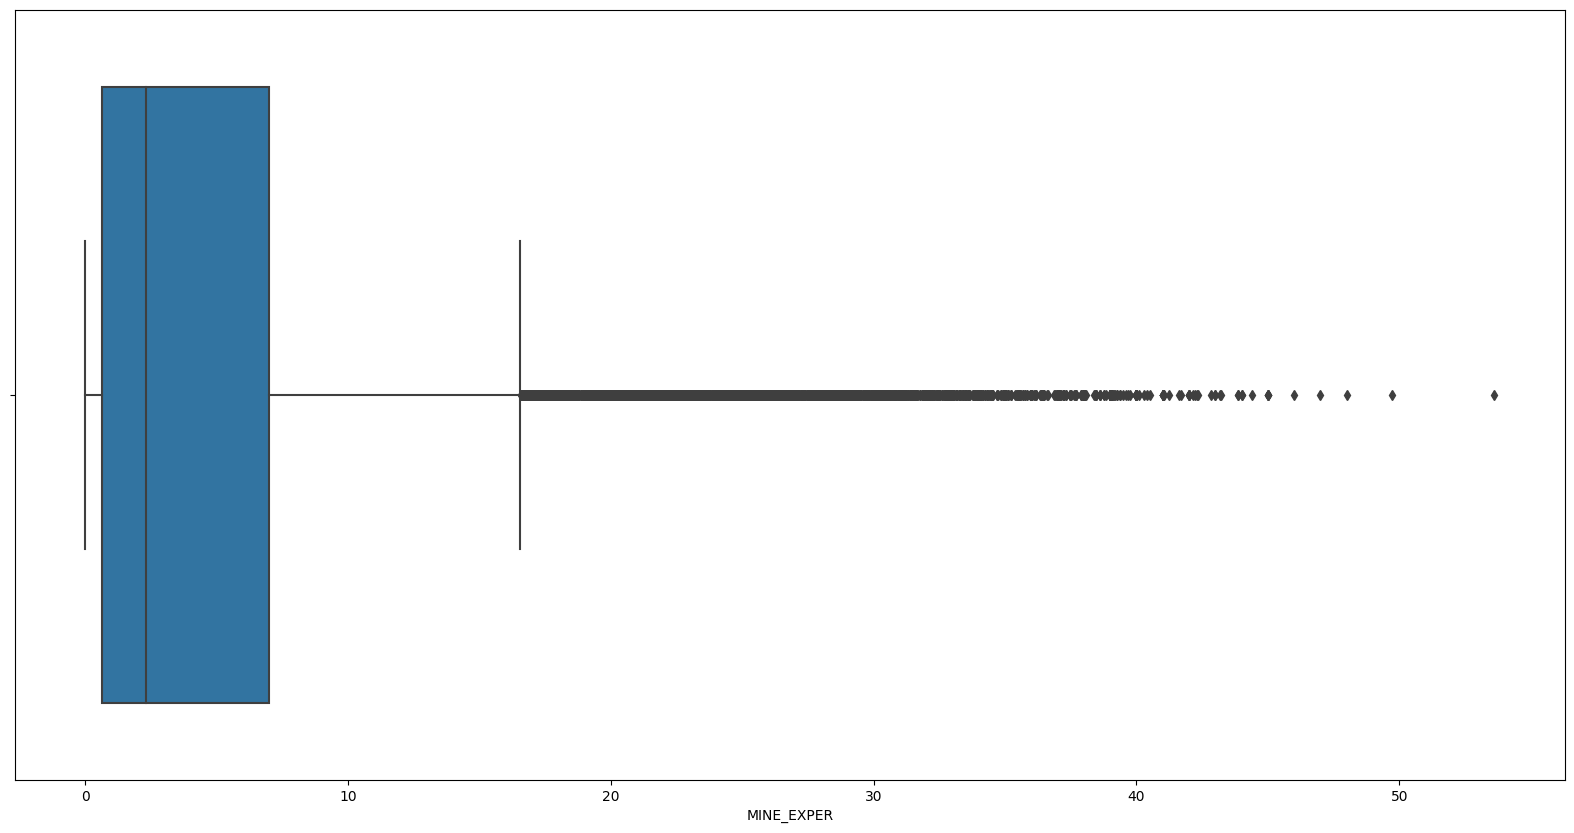

In [194]:
sns.boxplot(x=lee_2['MINE_EXPER'], data = lee_2)

<AxesSubplot: xlabel='JOB_EXPER'>

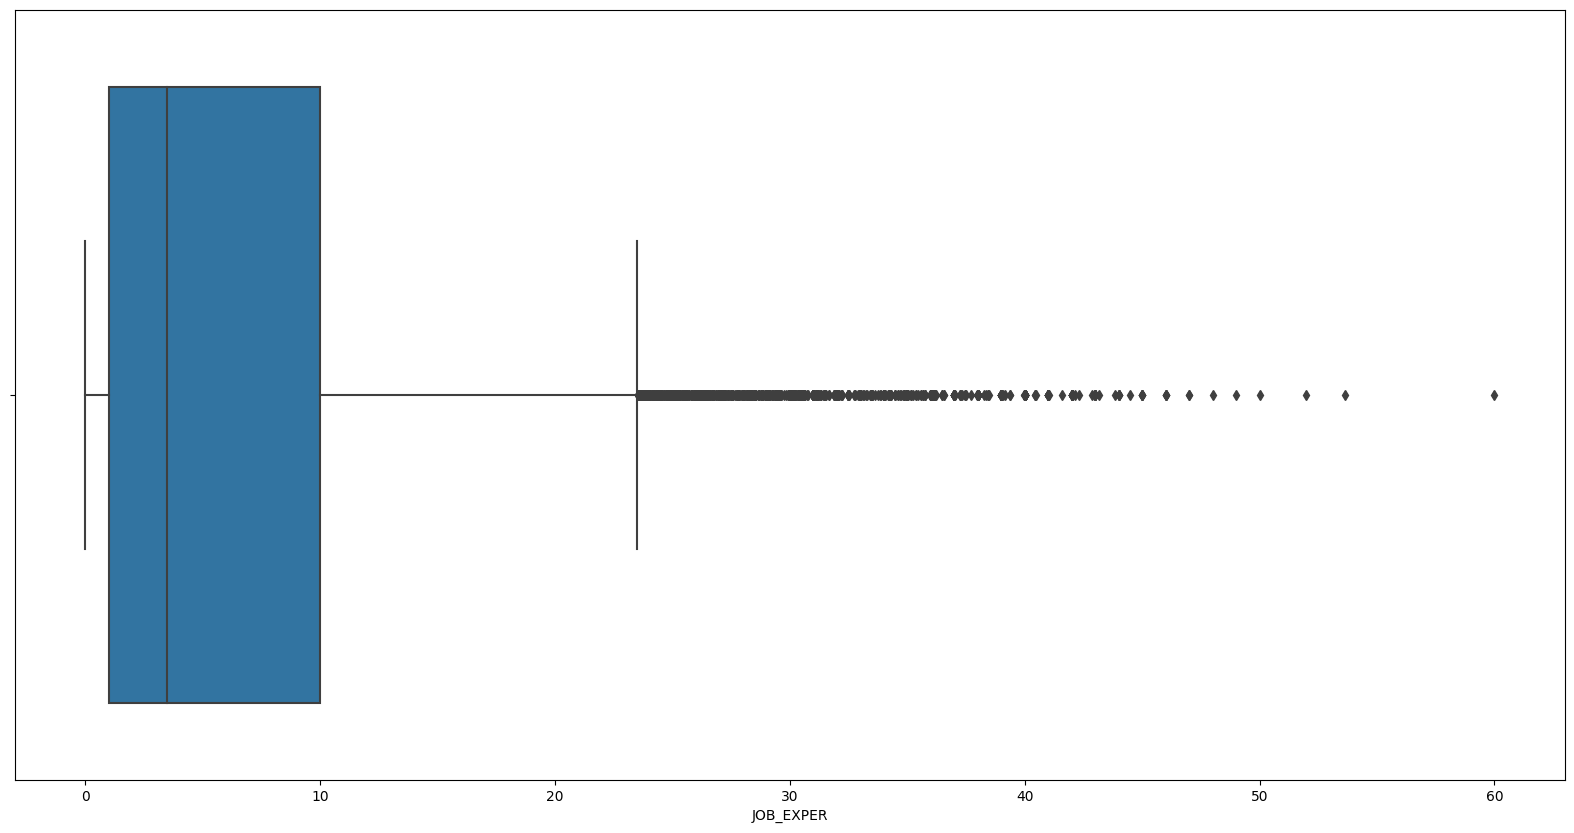

In [195]:
sns.boxplot(x=lee_2['JOB_EXPER'], data = lee_2)


In [196]:
lee_2.isnull().sum()

SUBUNIT_CD             0
SUBUNIT                0
ACCIDENT_DT            0
CAL_YR                 0
CAL_QTR                0
FISCAL_YR              0
FISCAL_QTR             0
ACCIDENT_TIME          0
DEGREE_INJURY_CD       0
DEGREE_INJURY          0
FIPS_STATE_CD          0
MINING_EQUIP_CD        0
EQUIP_MFR_CD           0
SHIFT_BEGIN_TIME      32
ACCIDENT_TYPE          0
NO_INJURIES            0
TOT_EXPER              0
MINE_EXPER             0
JOB_EXPER              0
OCCUPATION_CD          0
OCCUPATION             0
ACTIVITY_CD            0
ACTIVITY               0
INJURY_SOURCE_CD       0
INJURY_SOURCE          0
NATURE_INJURY_CD       0
NATURE_INJURY          0
INJ_BODY_PART_CD       0
INJ_BODY_PART          0
DAYS_LOST           4220
TRANS_TERM          1841
COAL_METAL_IND         0
CLASSIFICATION         0
dtype: int64

## Exploratory Data Analysis 

In [197]:
cols = lee_2[['SUBUNIT','CAL_YR','DEGREE_INJURY','ACCIDENT_TYPE','MINE_EXPER','COAL_METAL_IND','CLASSIFICATION']]

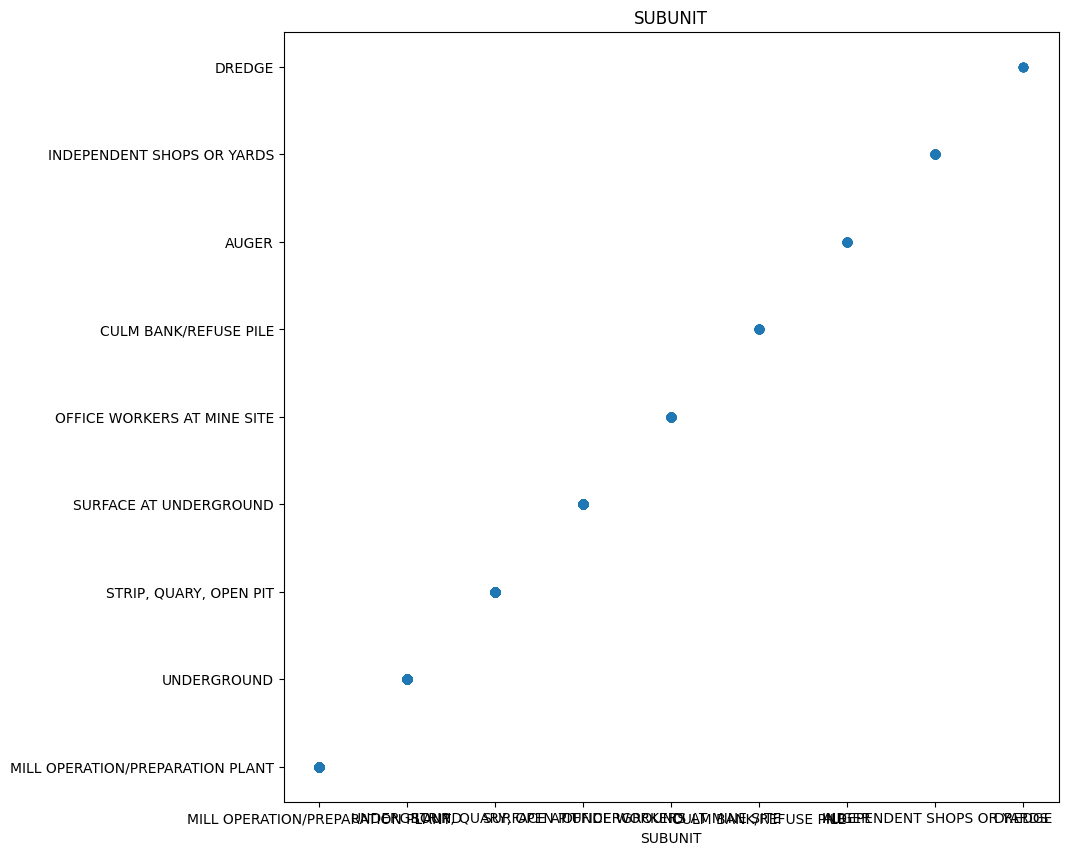

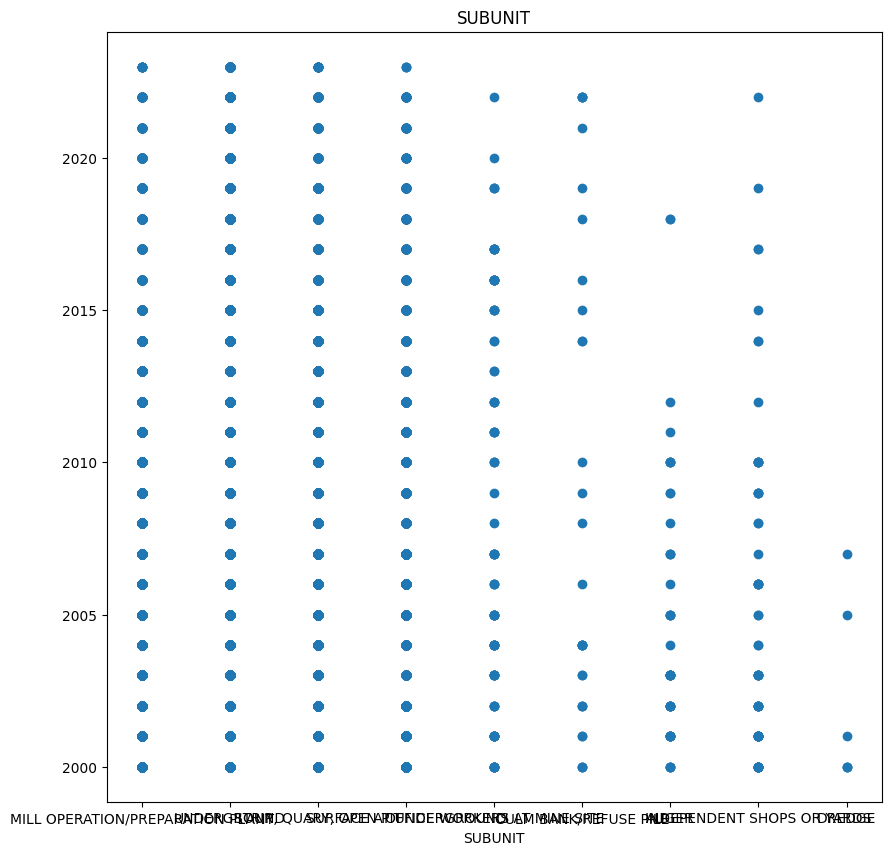

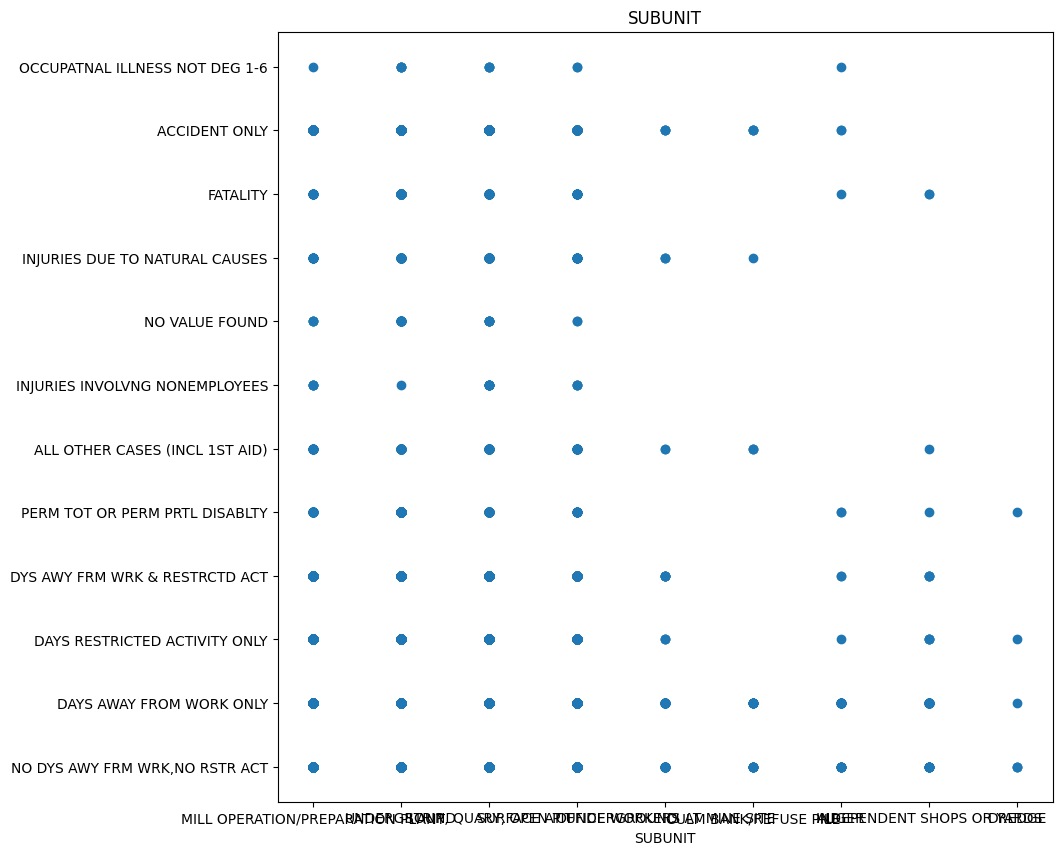

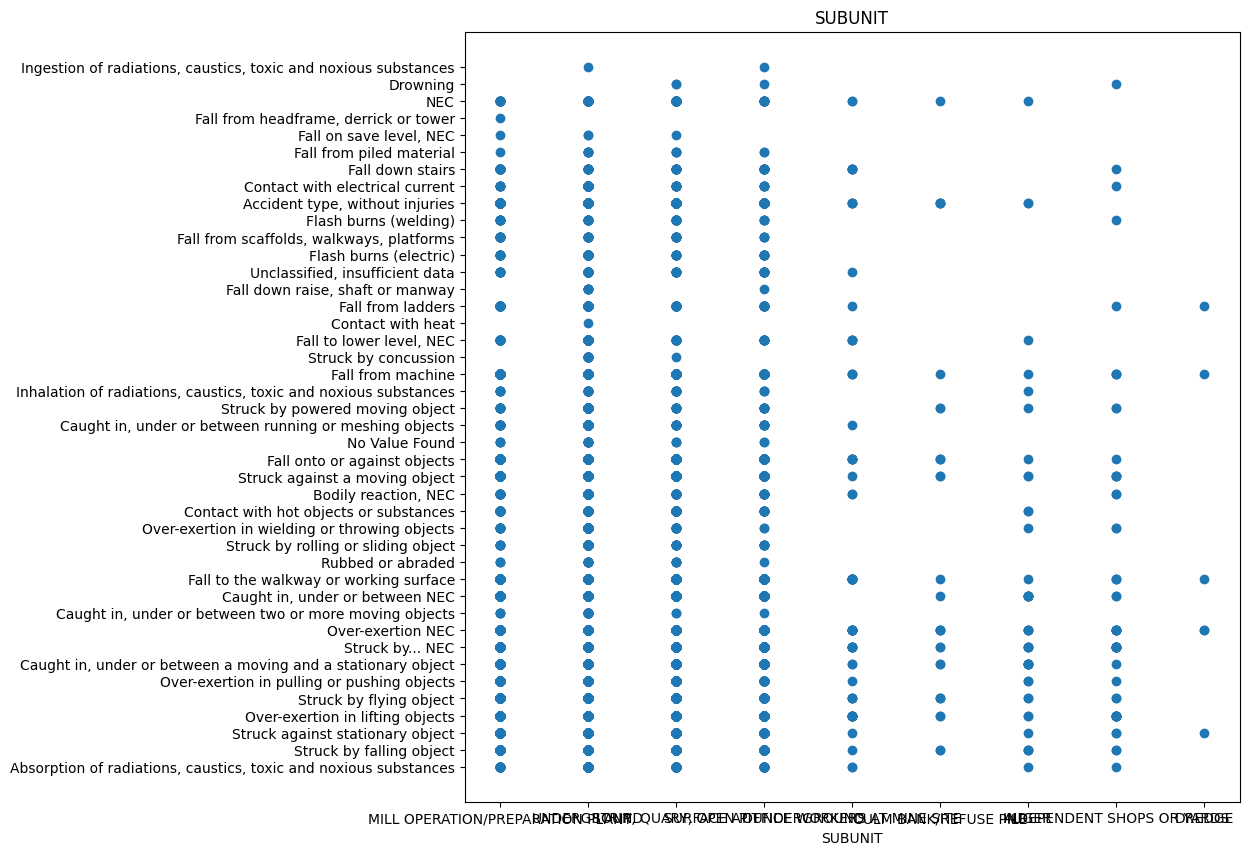

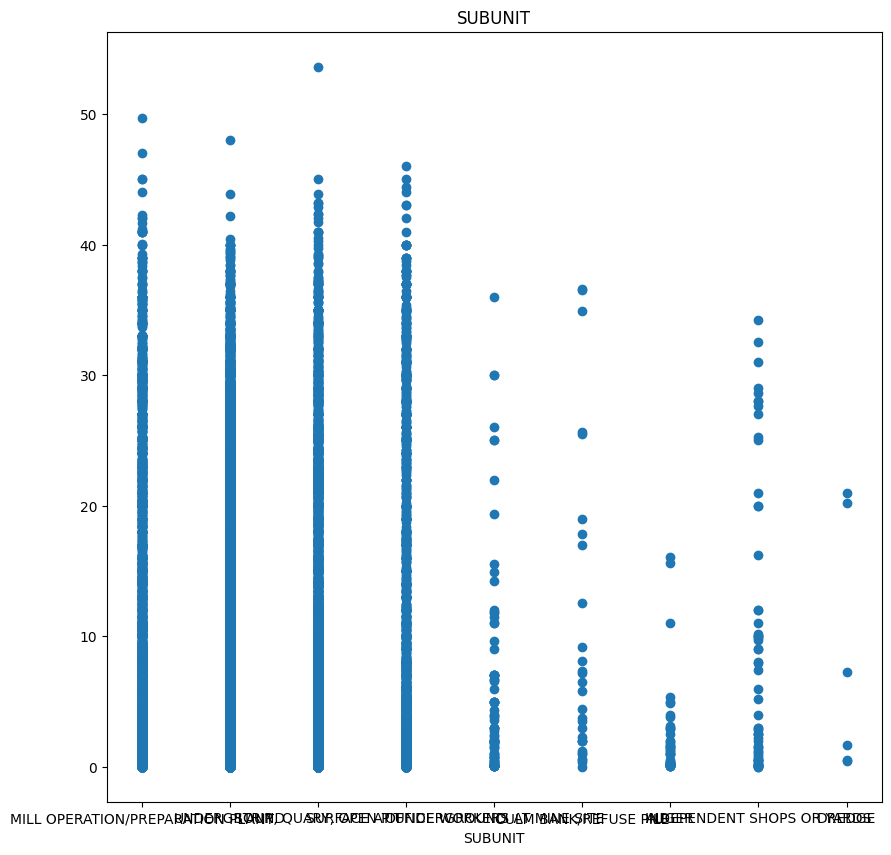

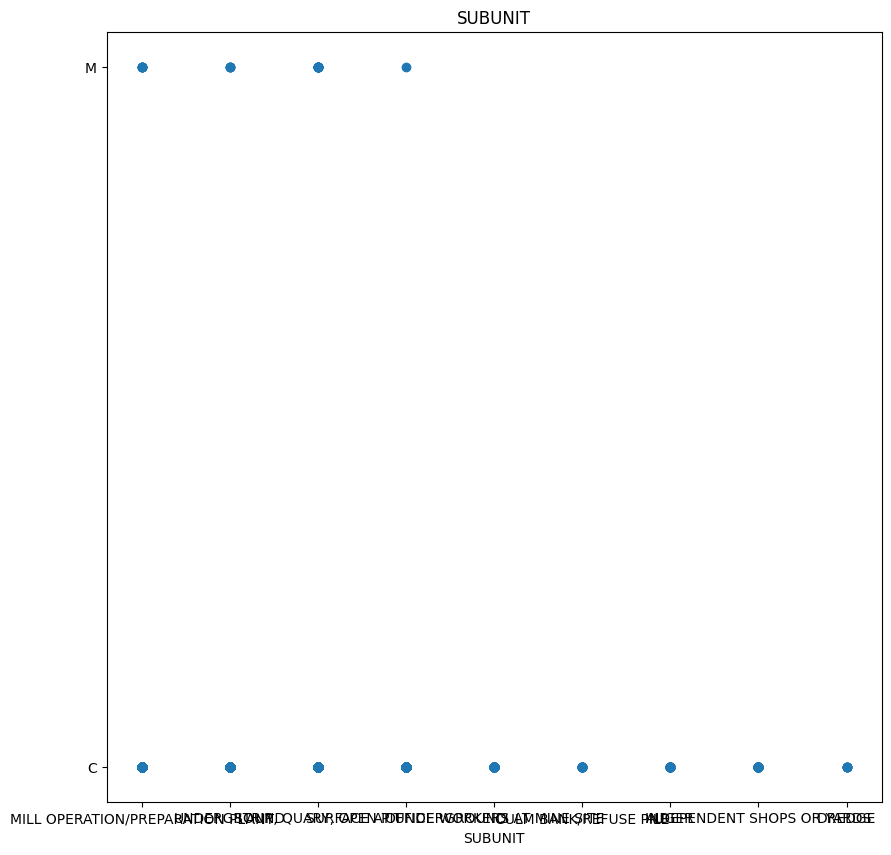

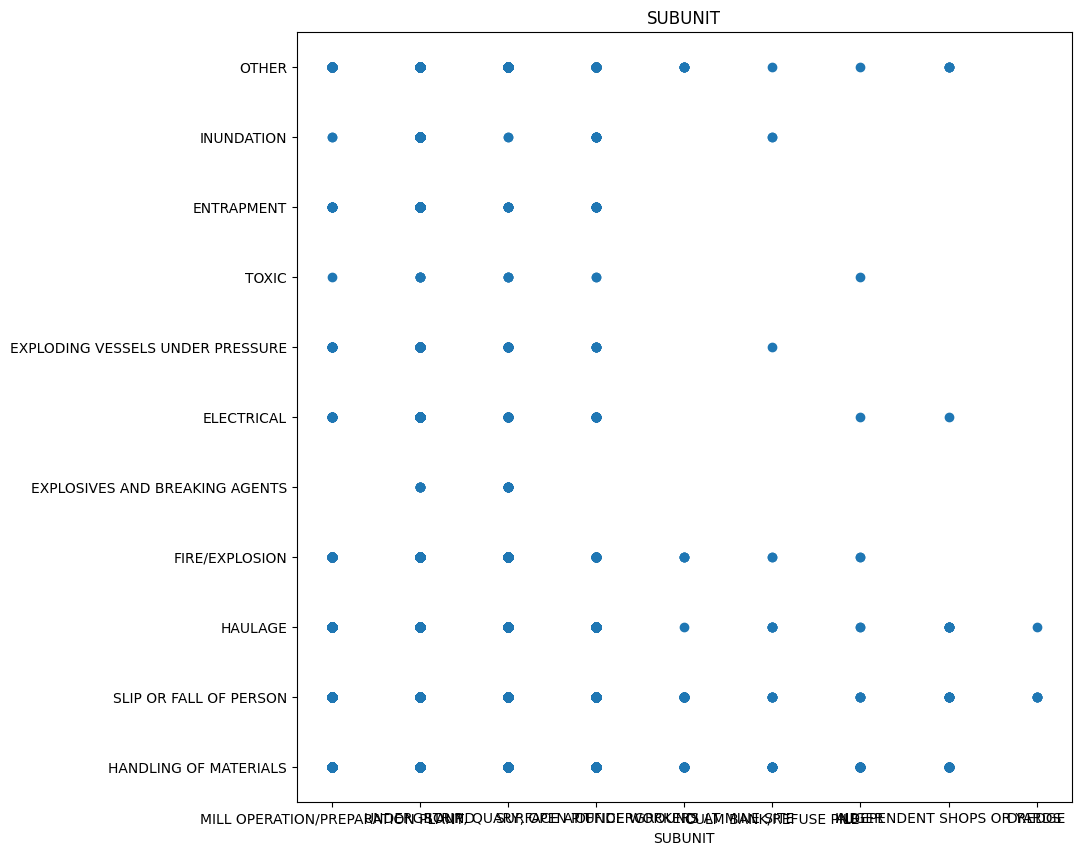

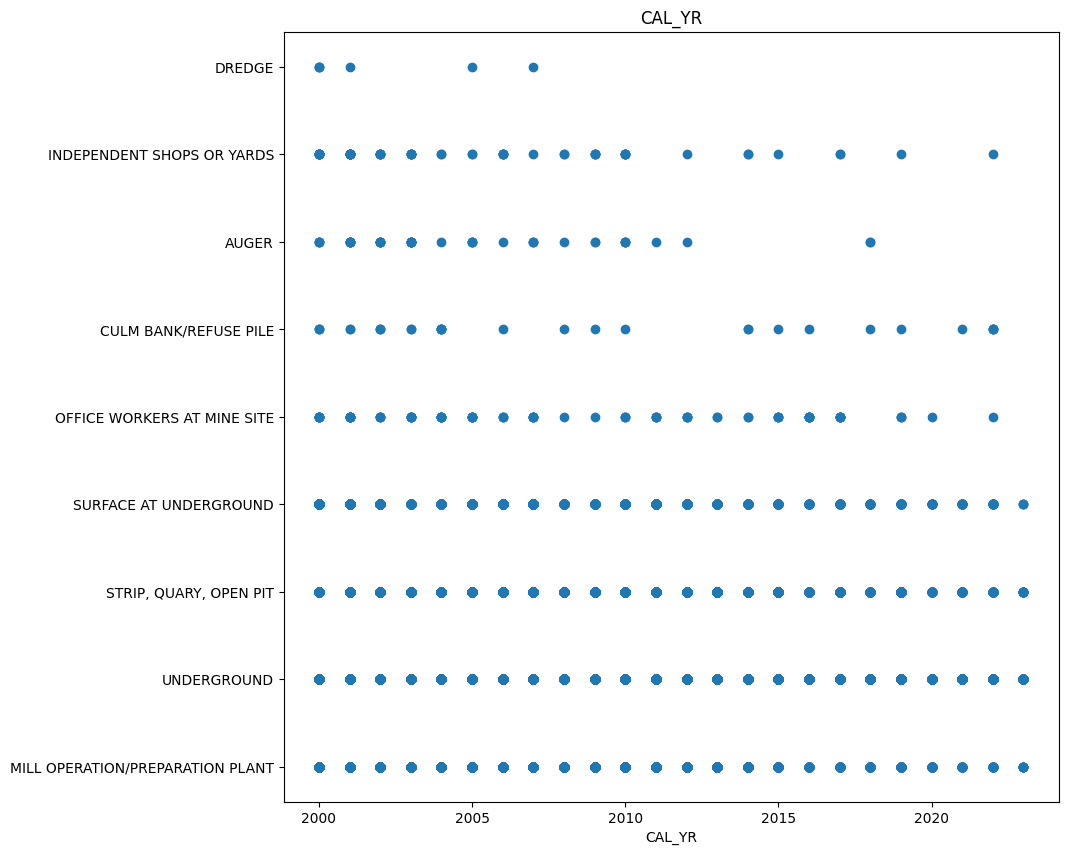

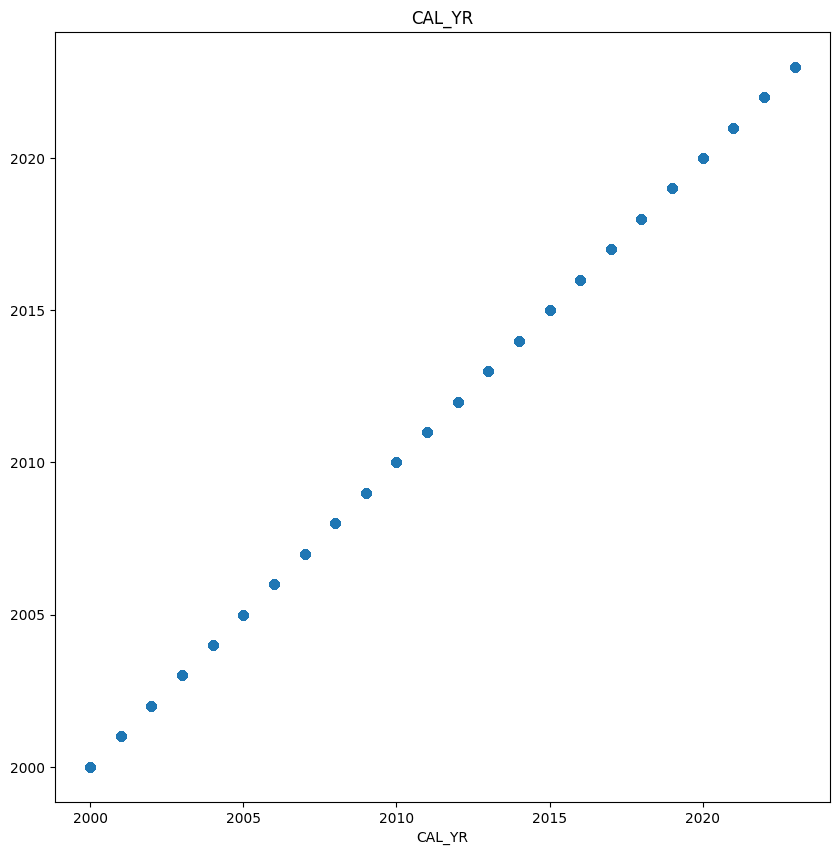

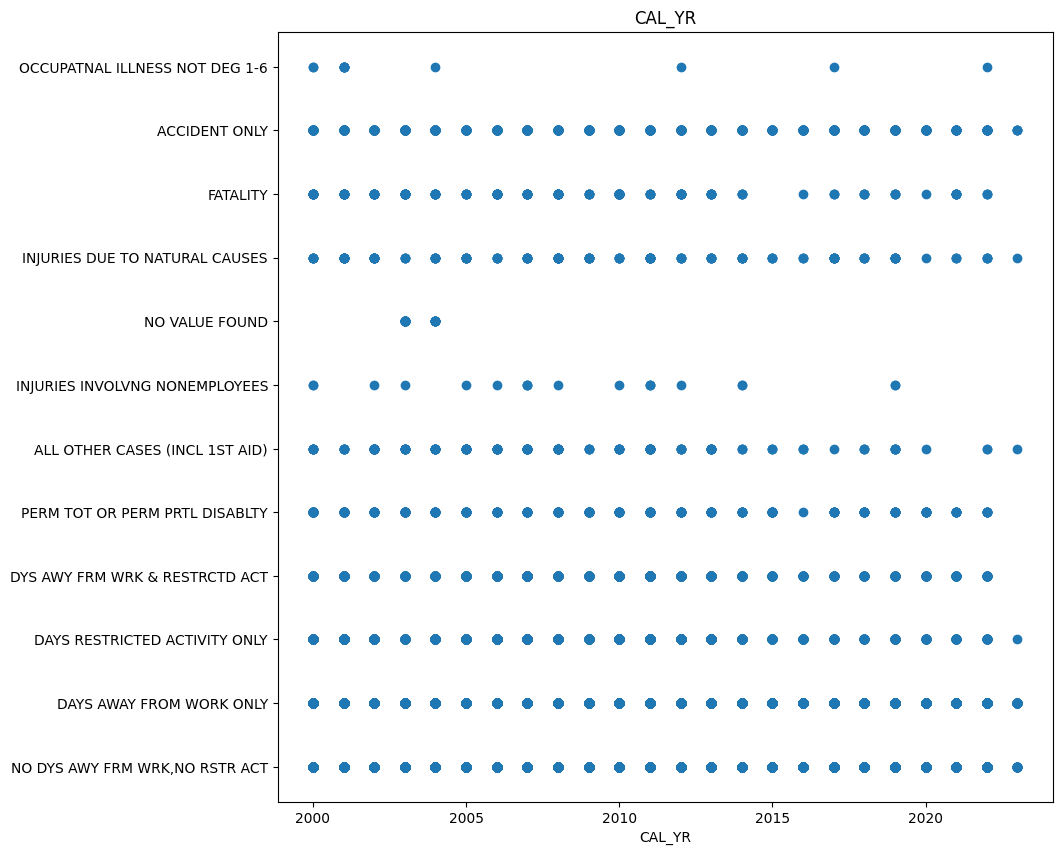

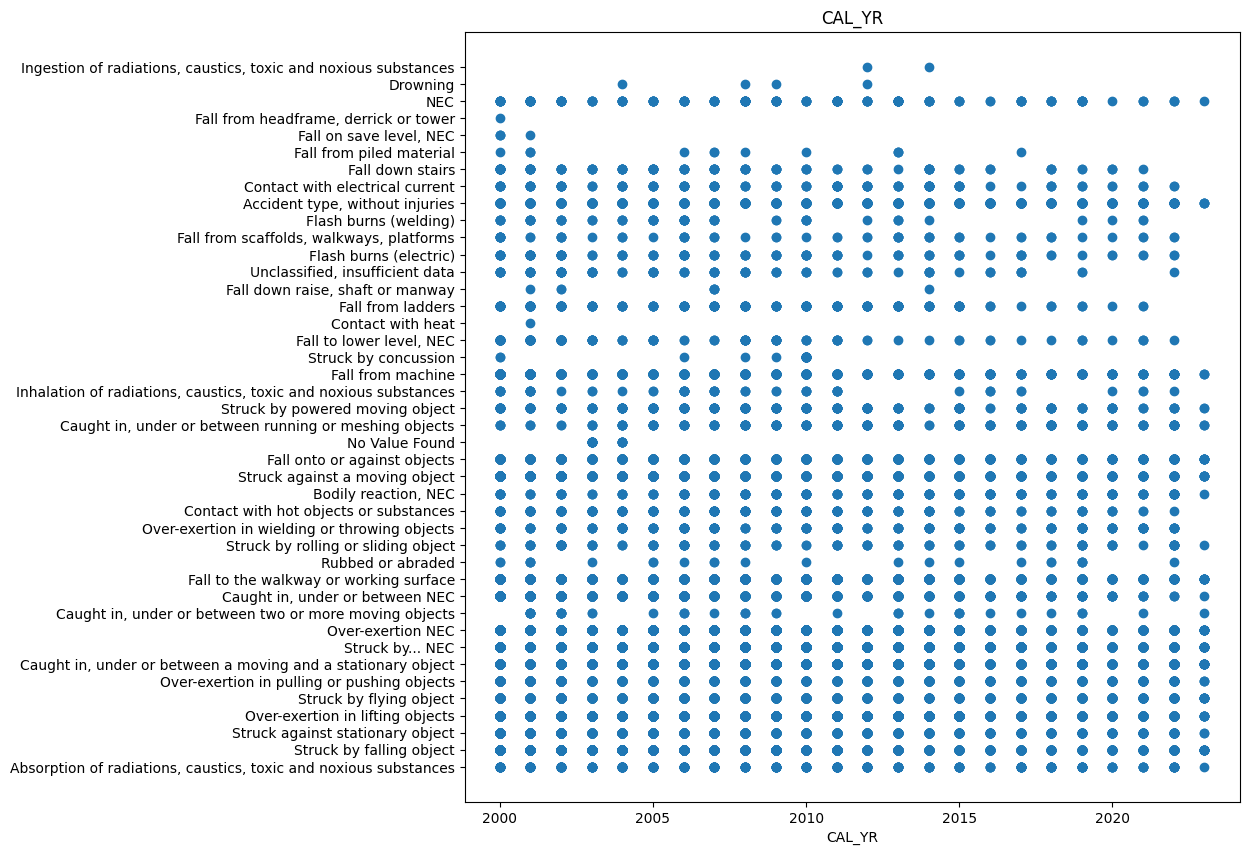

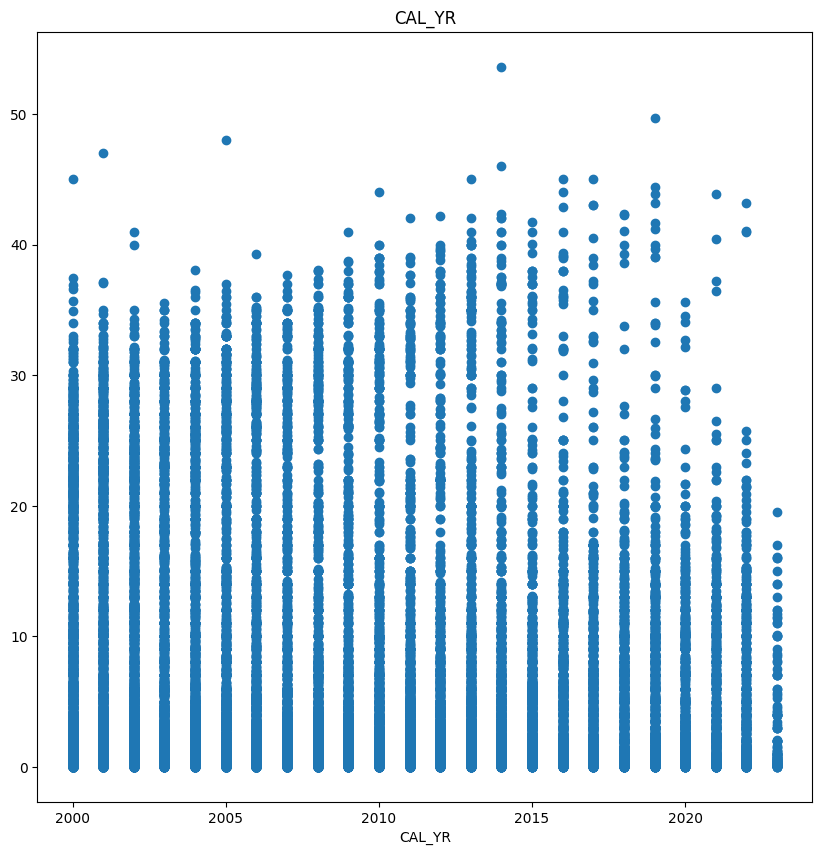

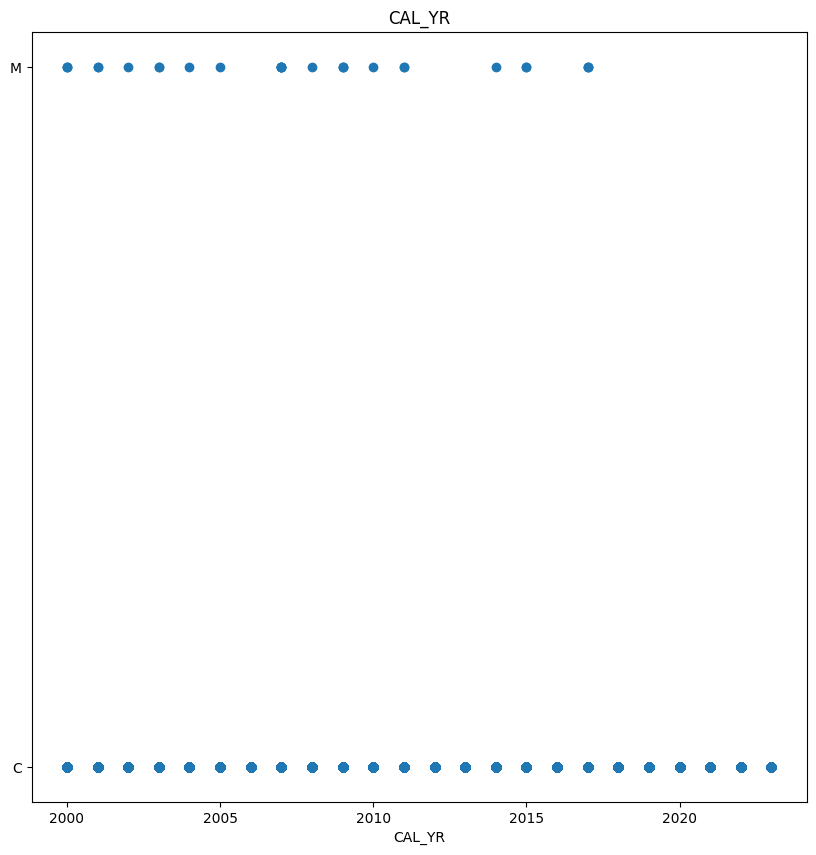

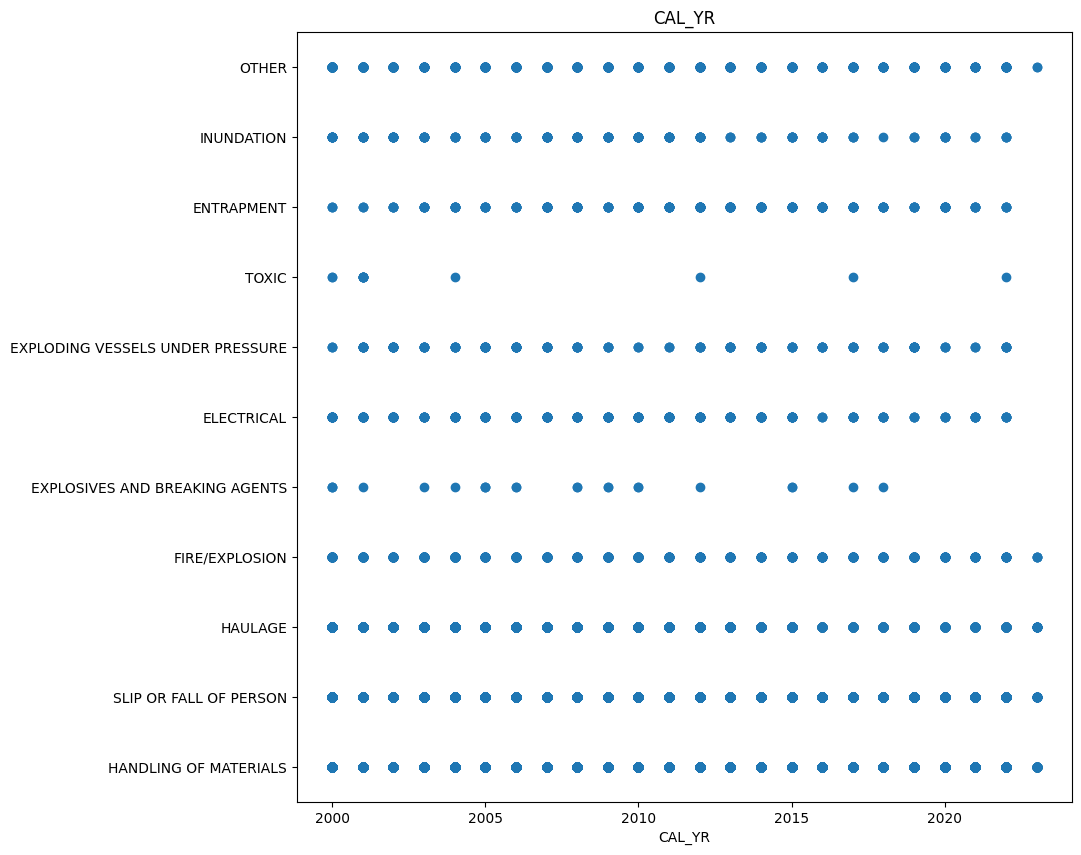

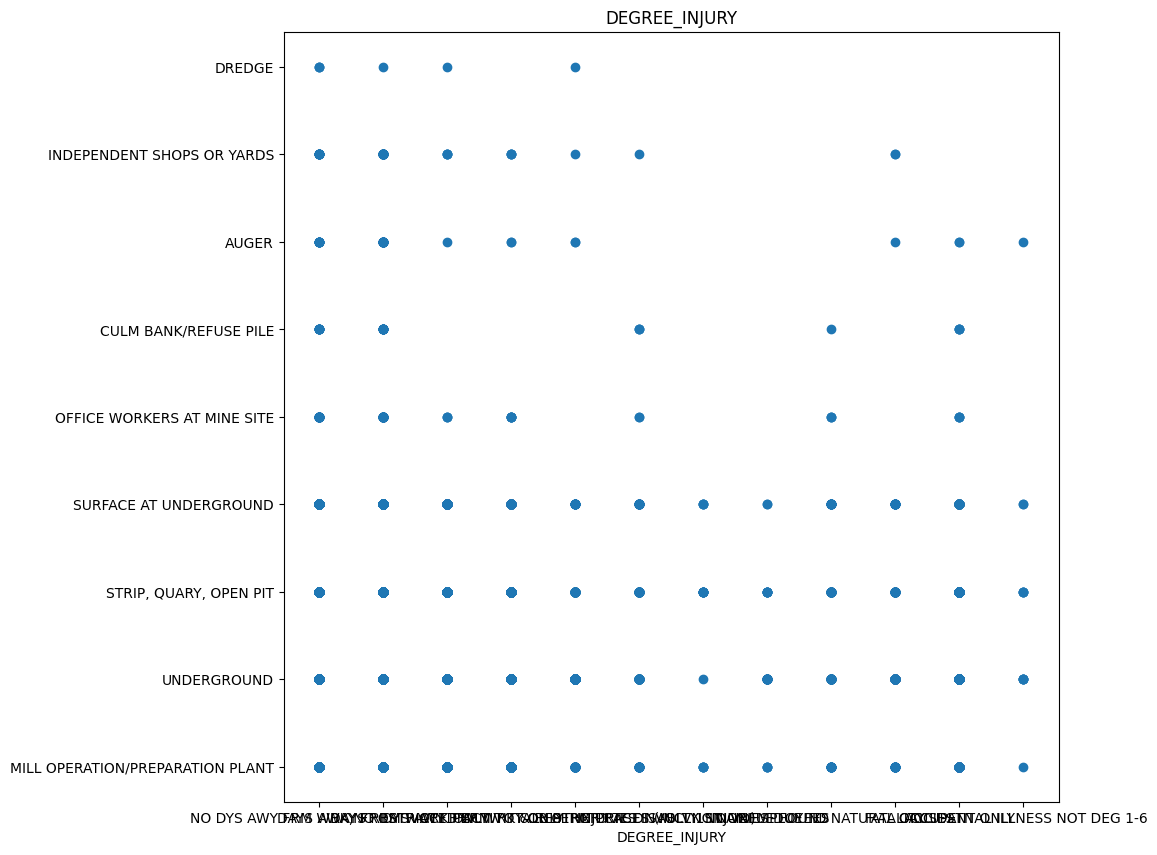

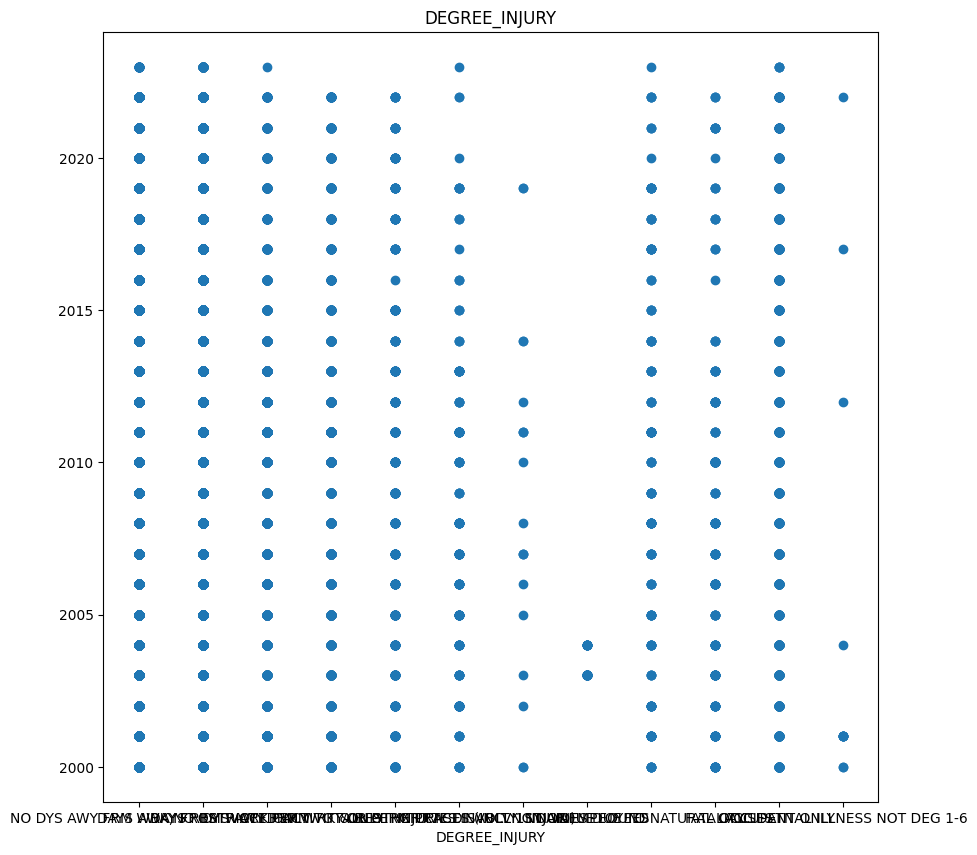

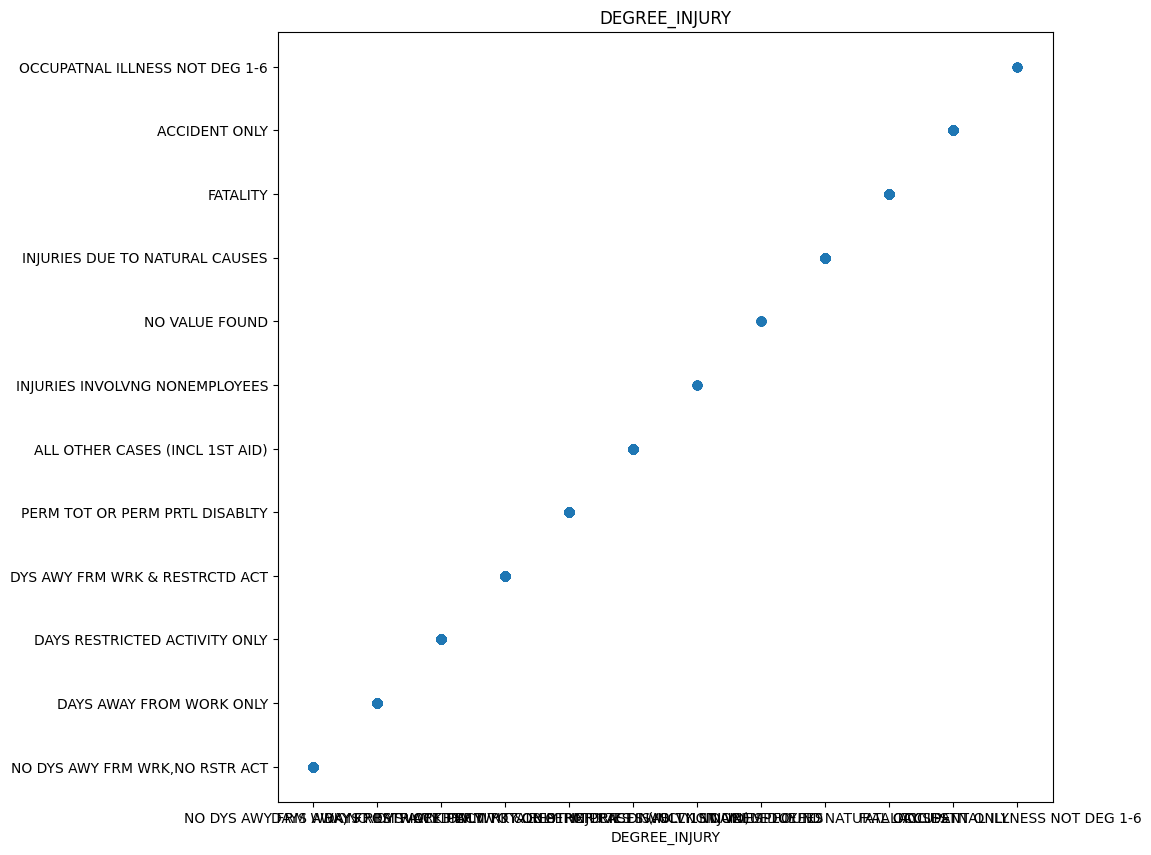

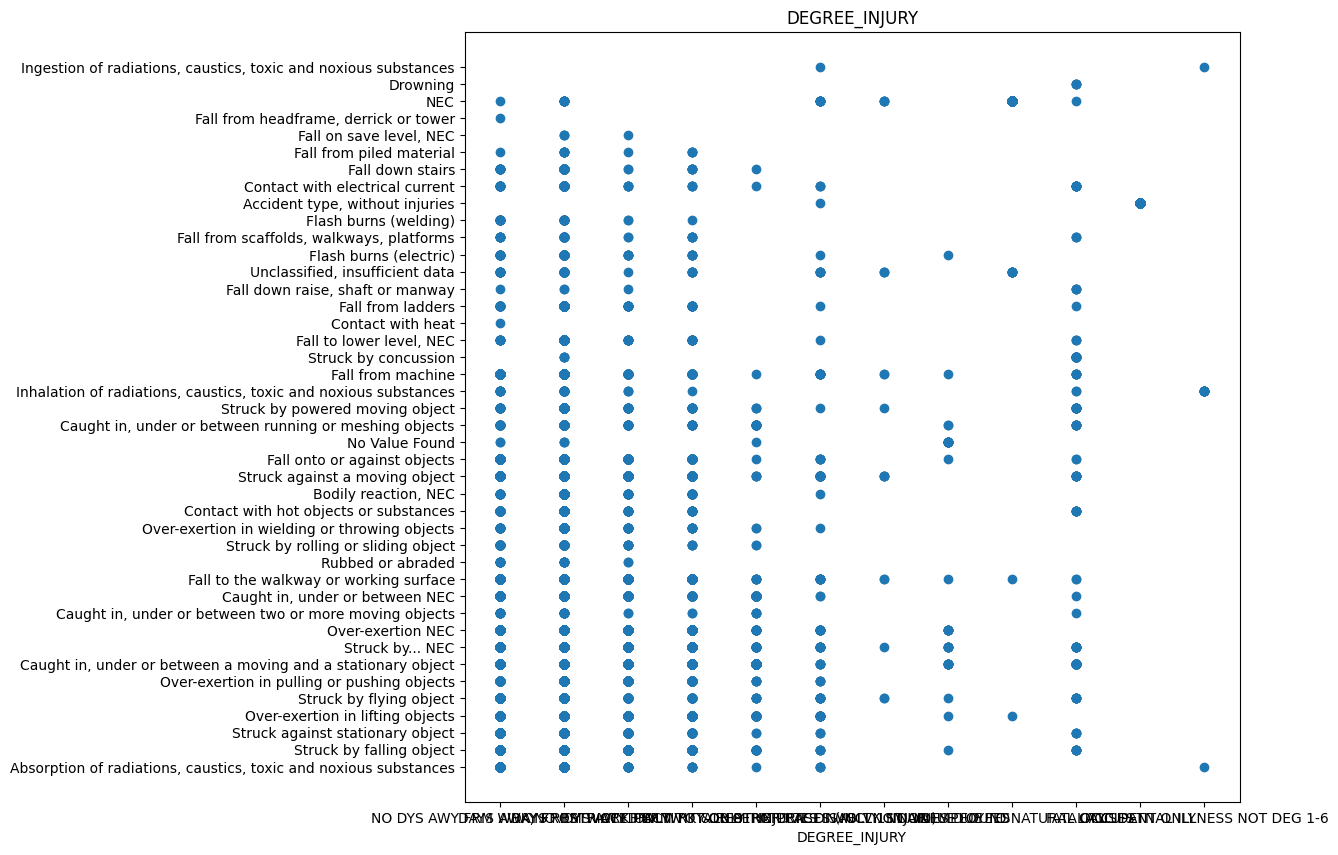

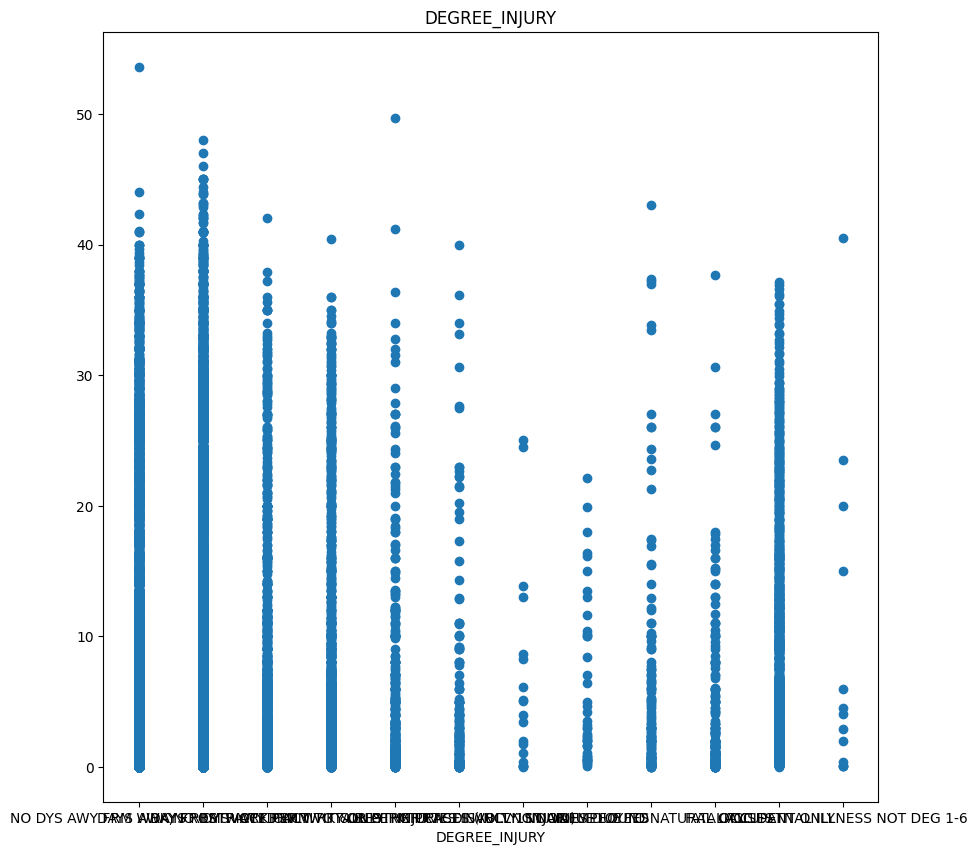

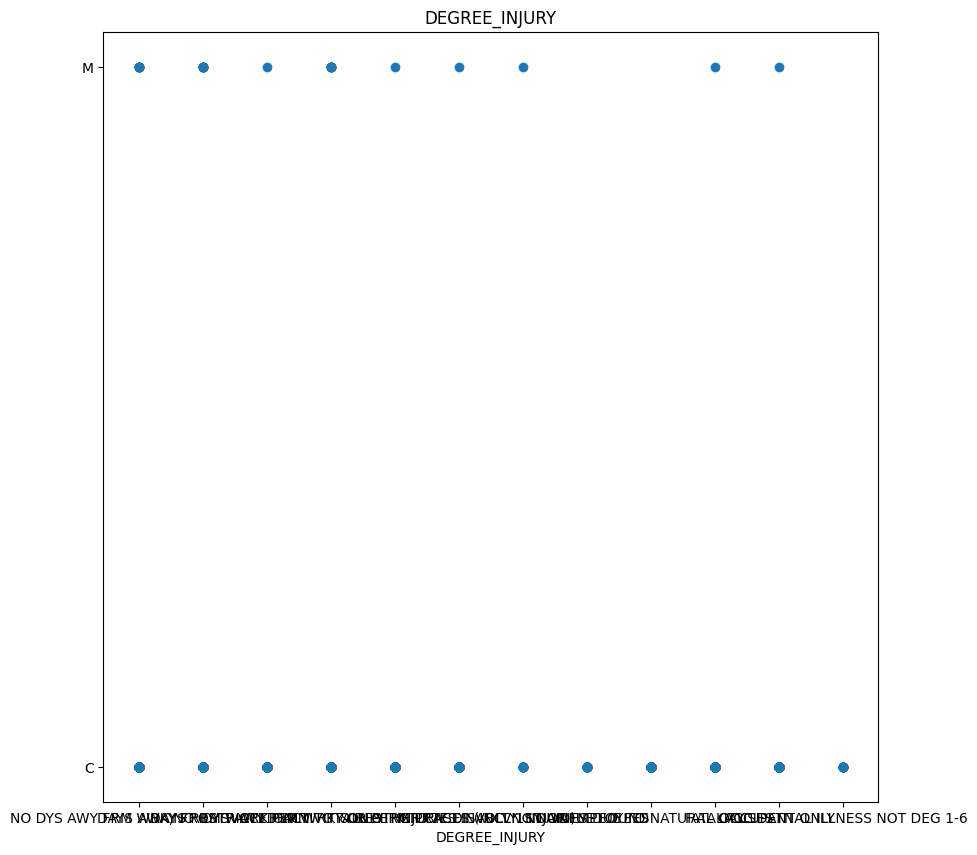

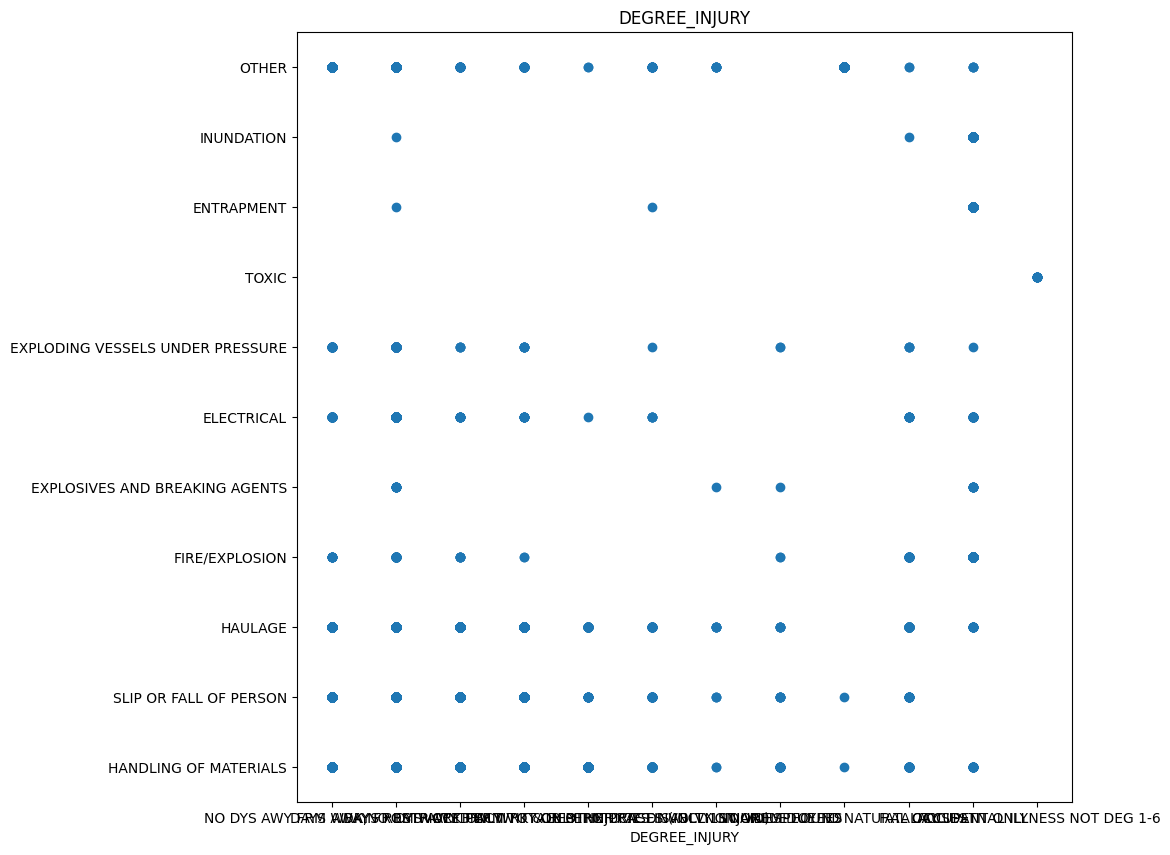

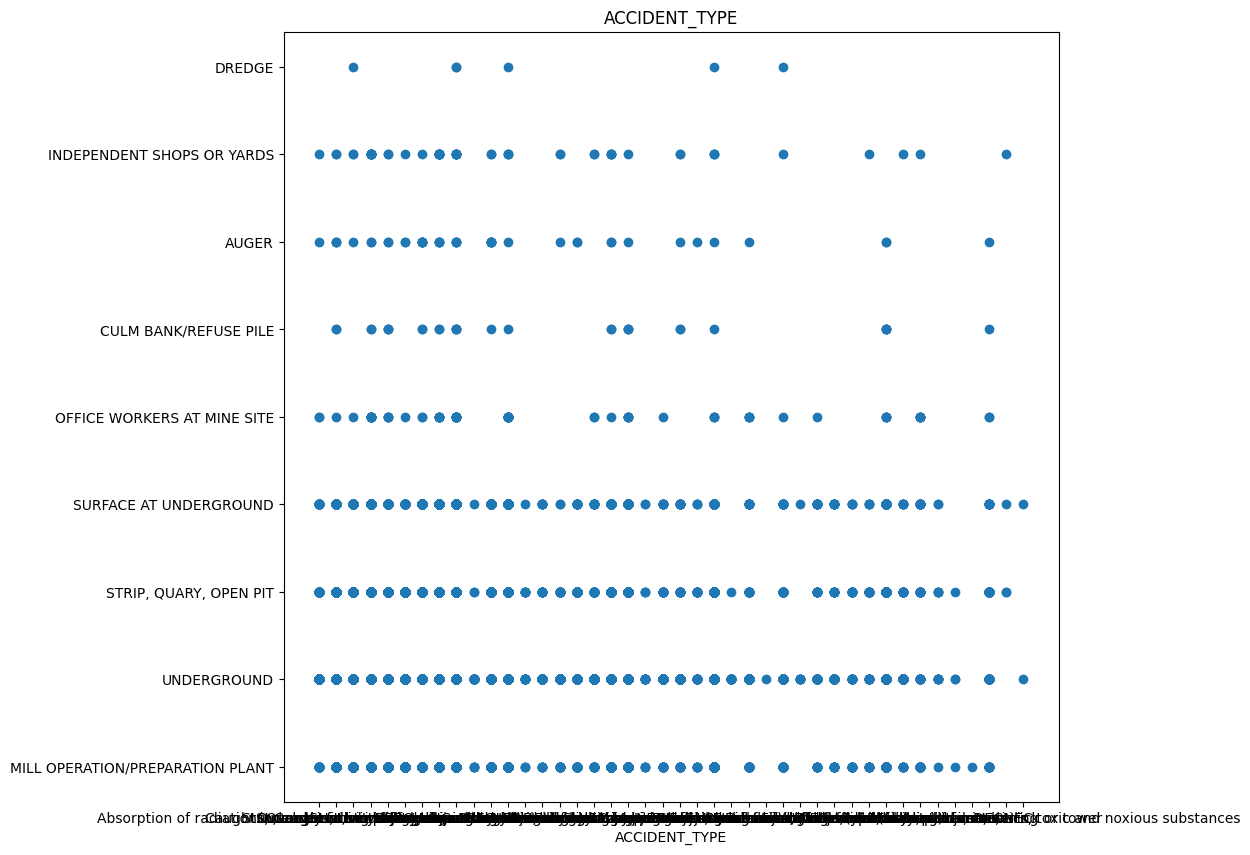

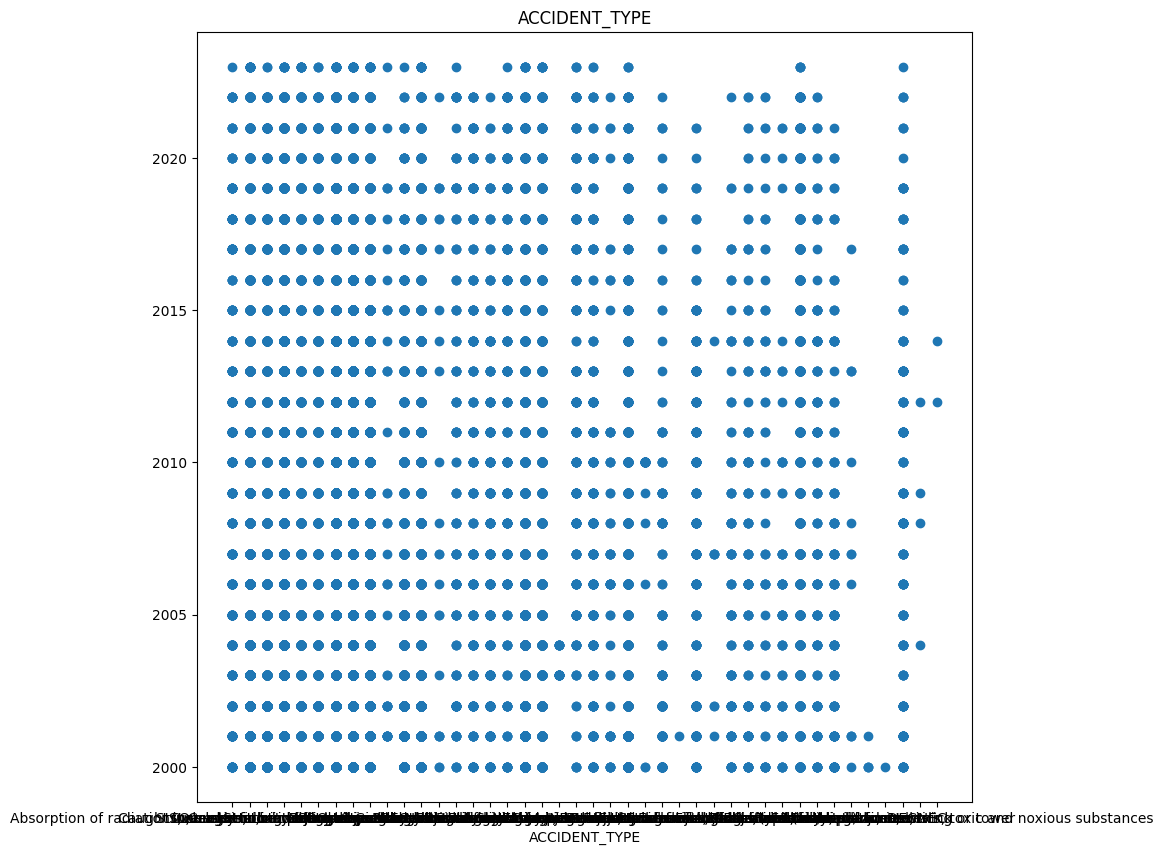

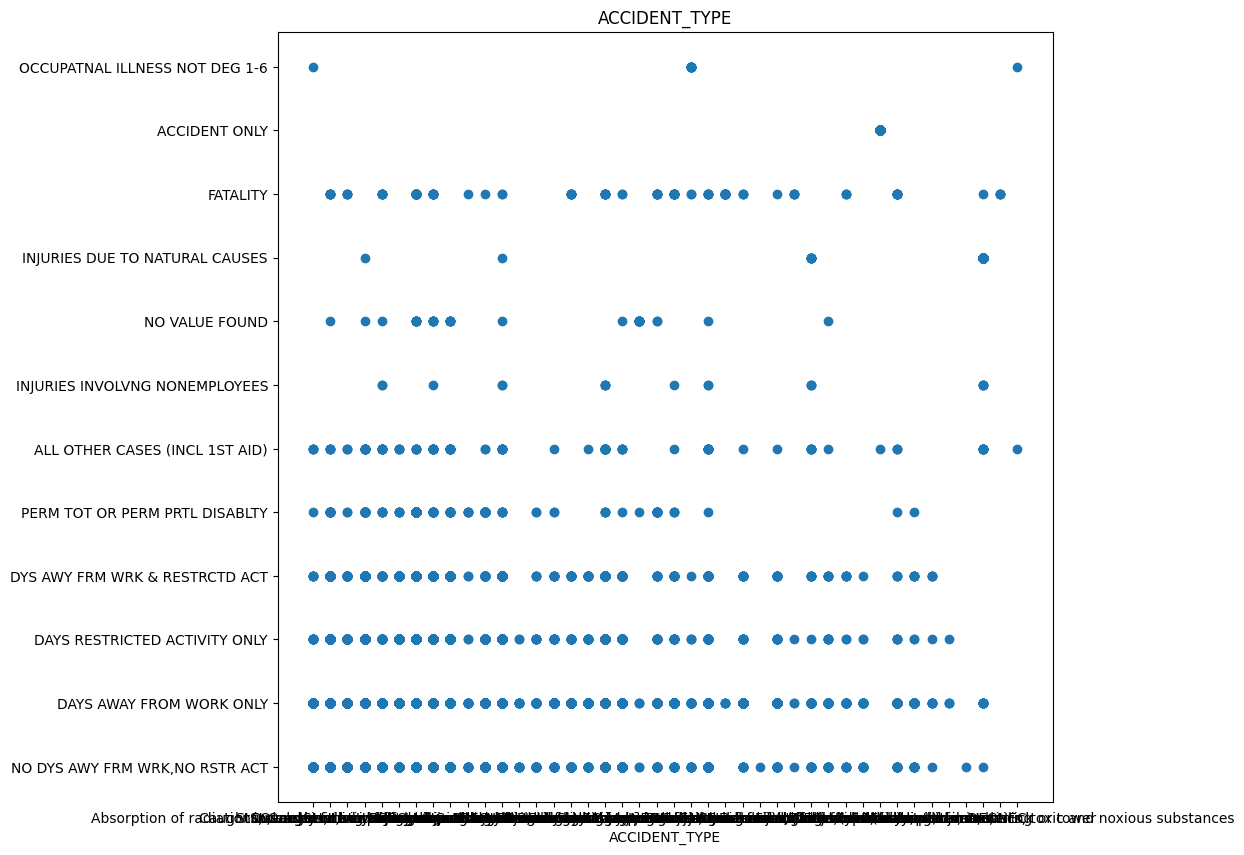

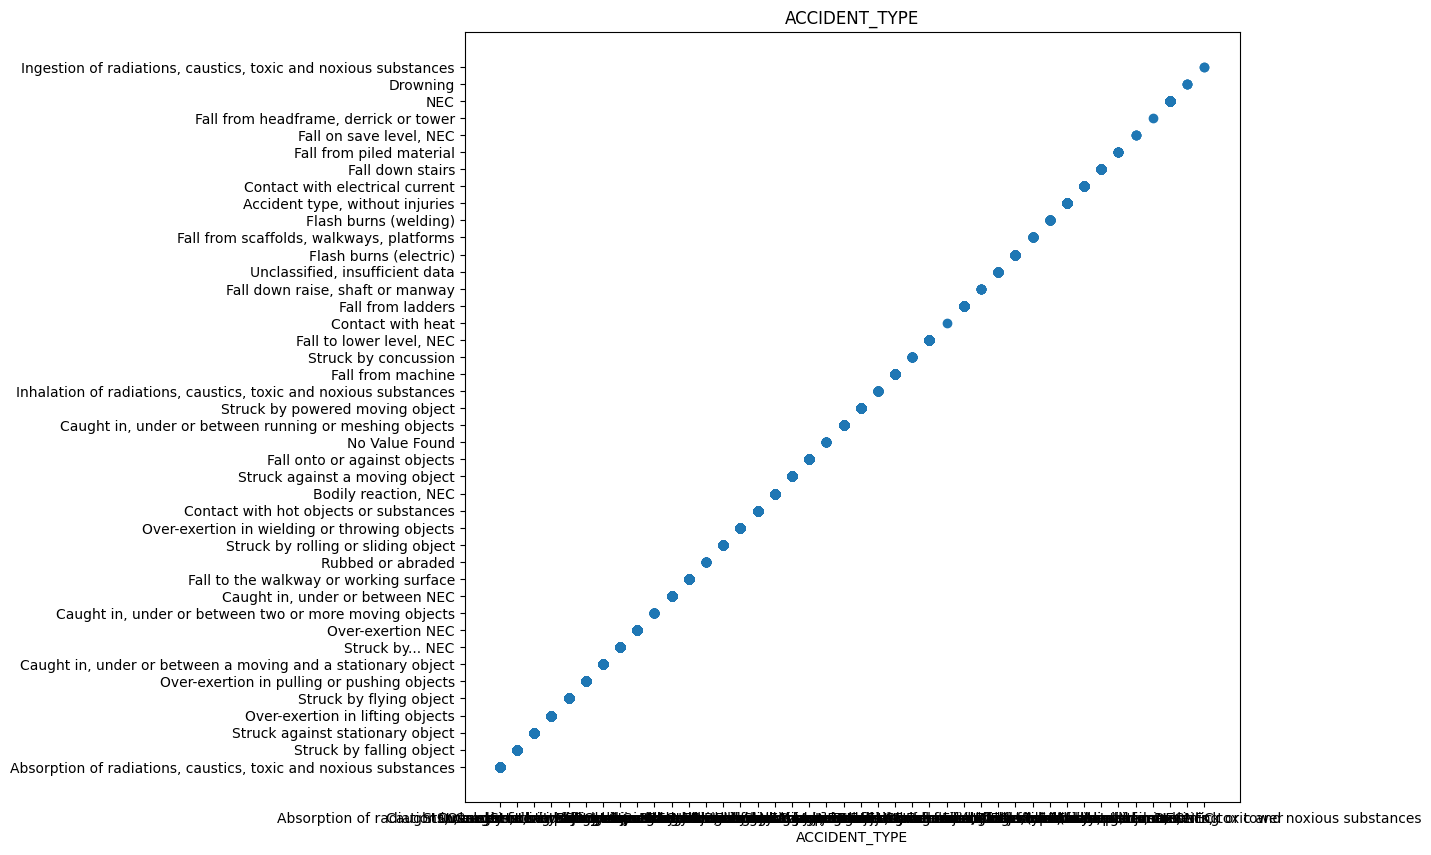

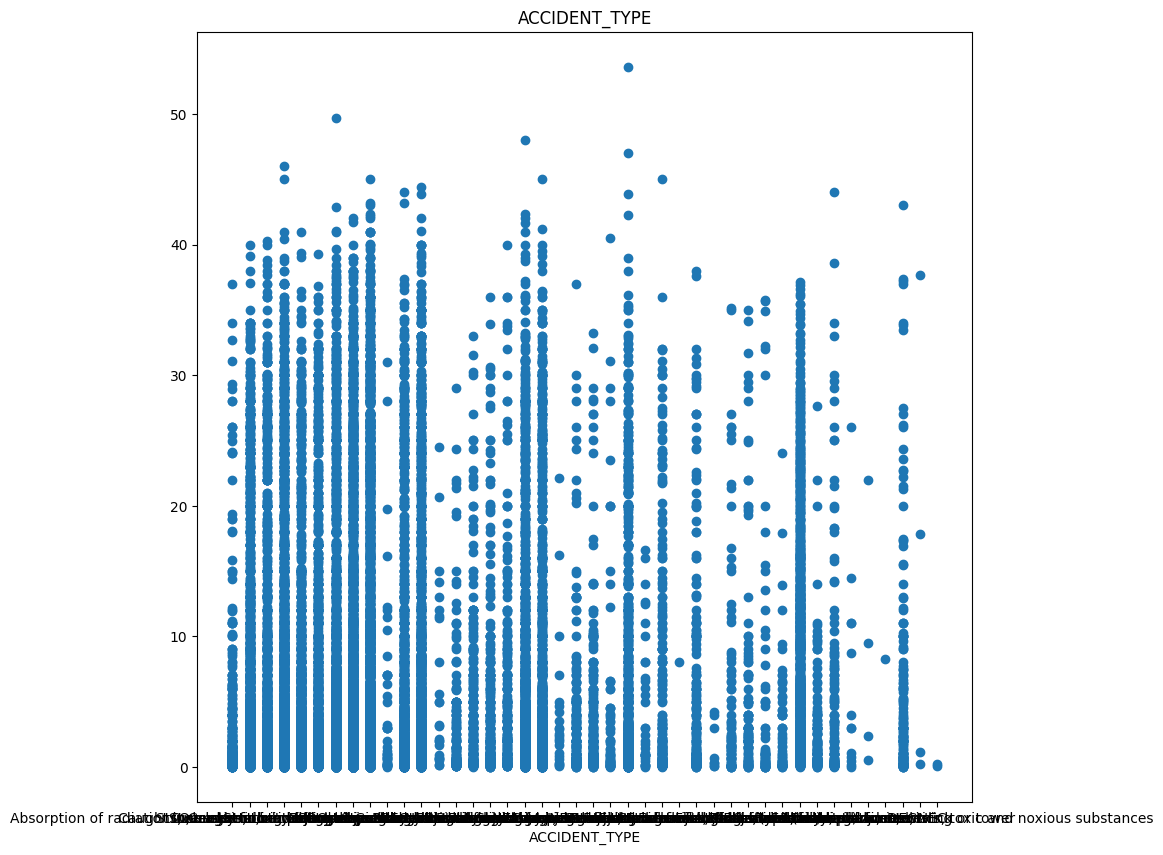

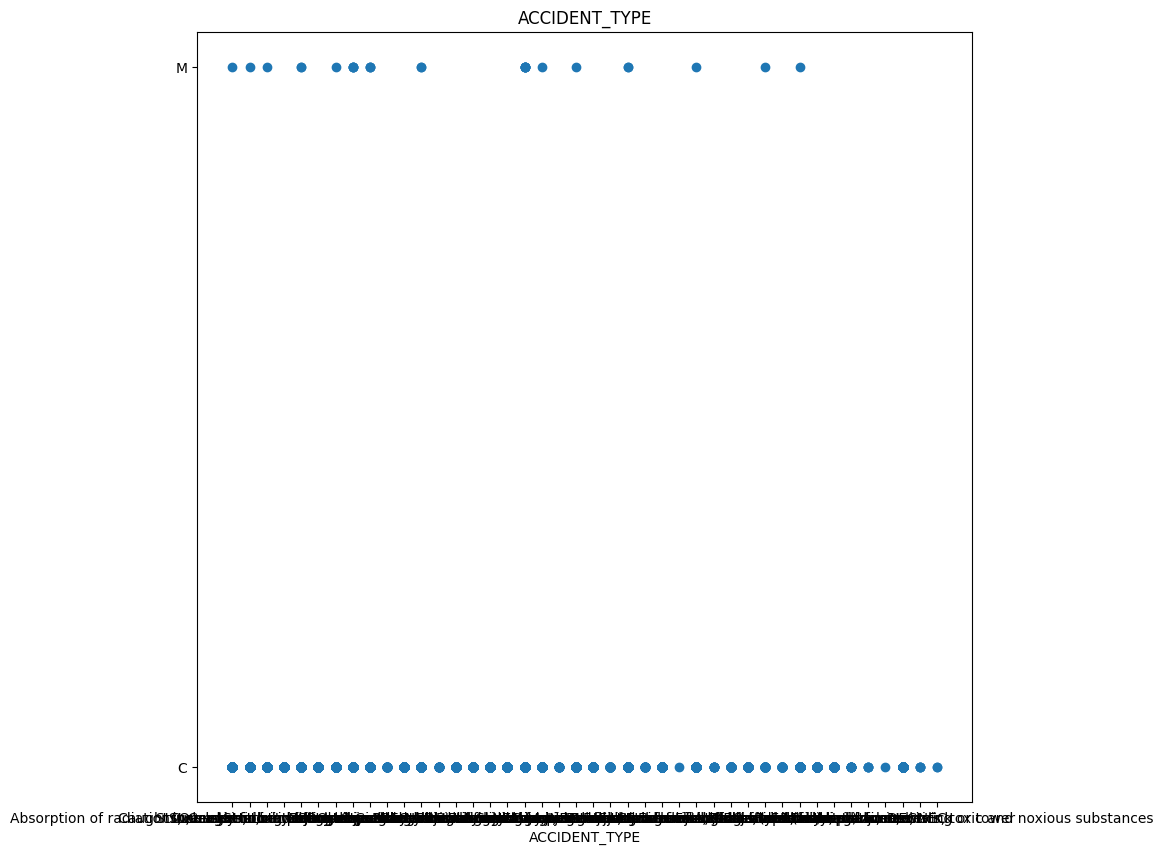

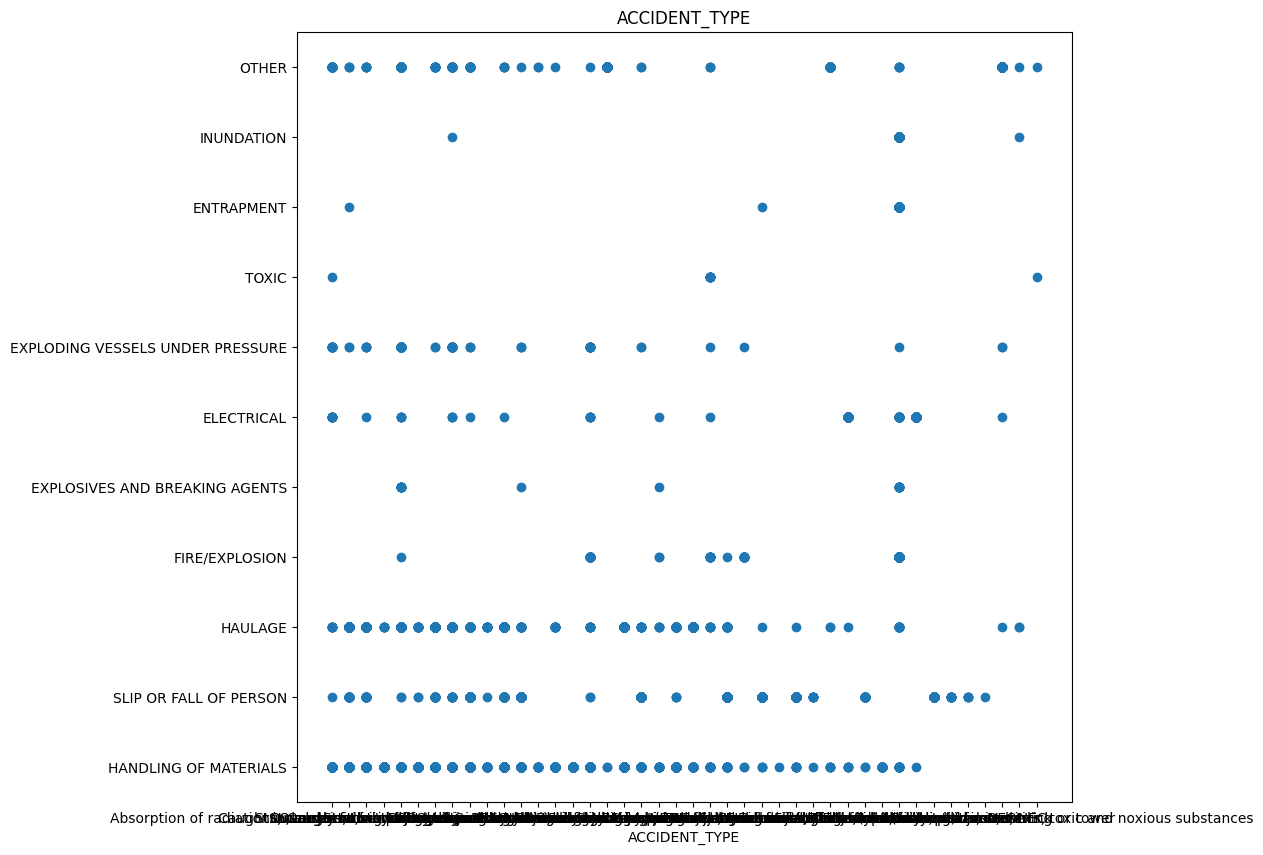

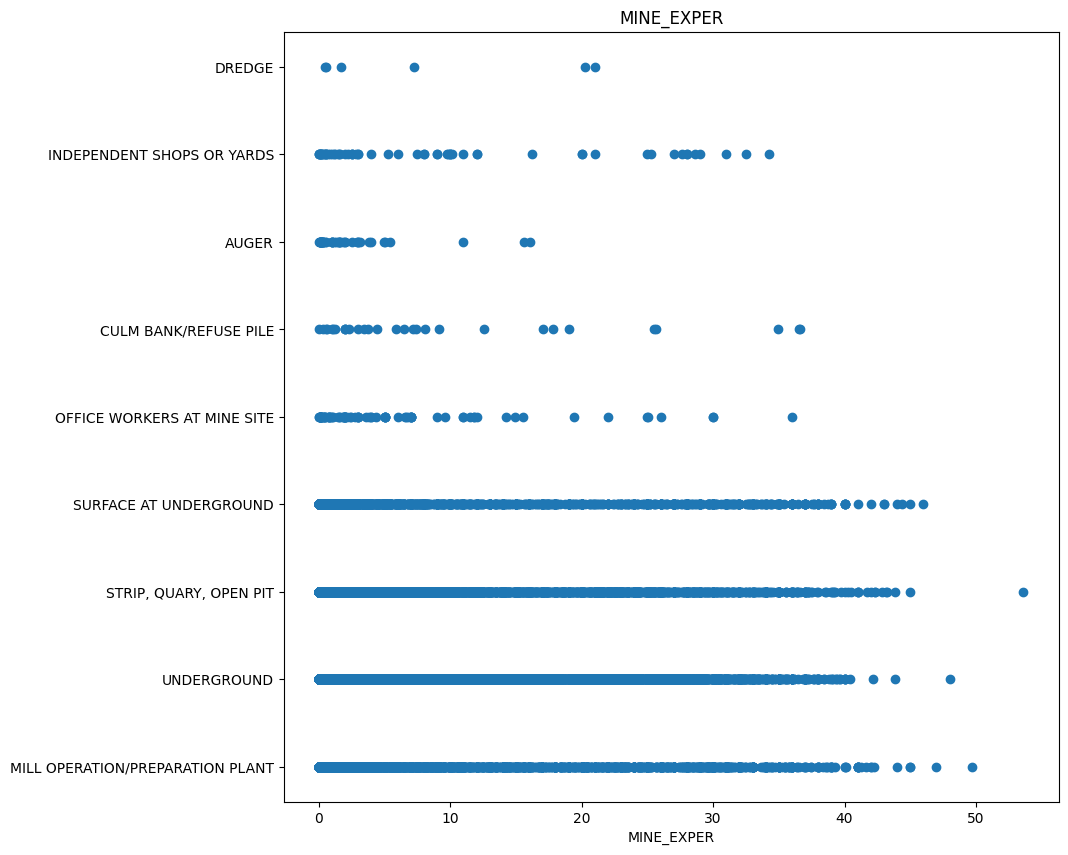

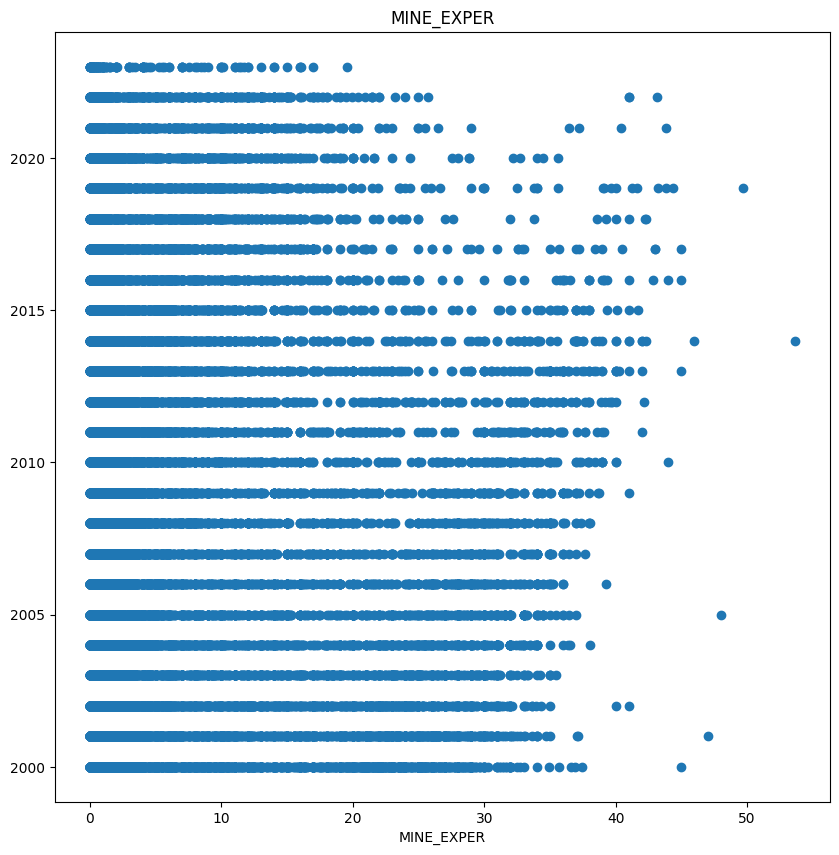

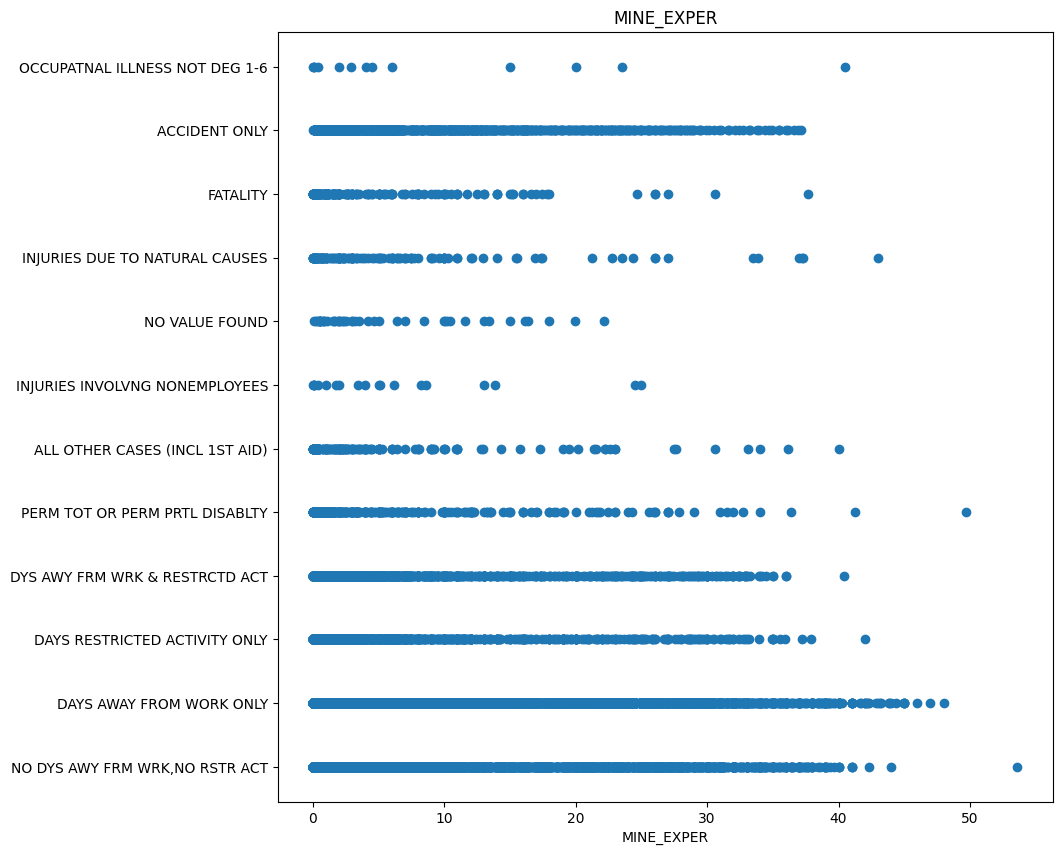

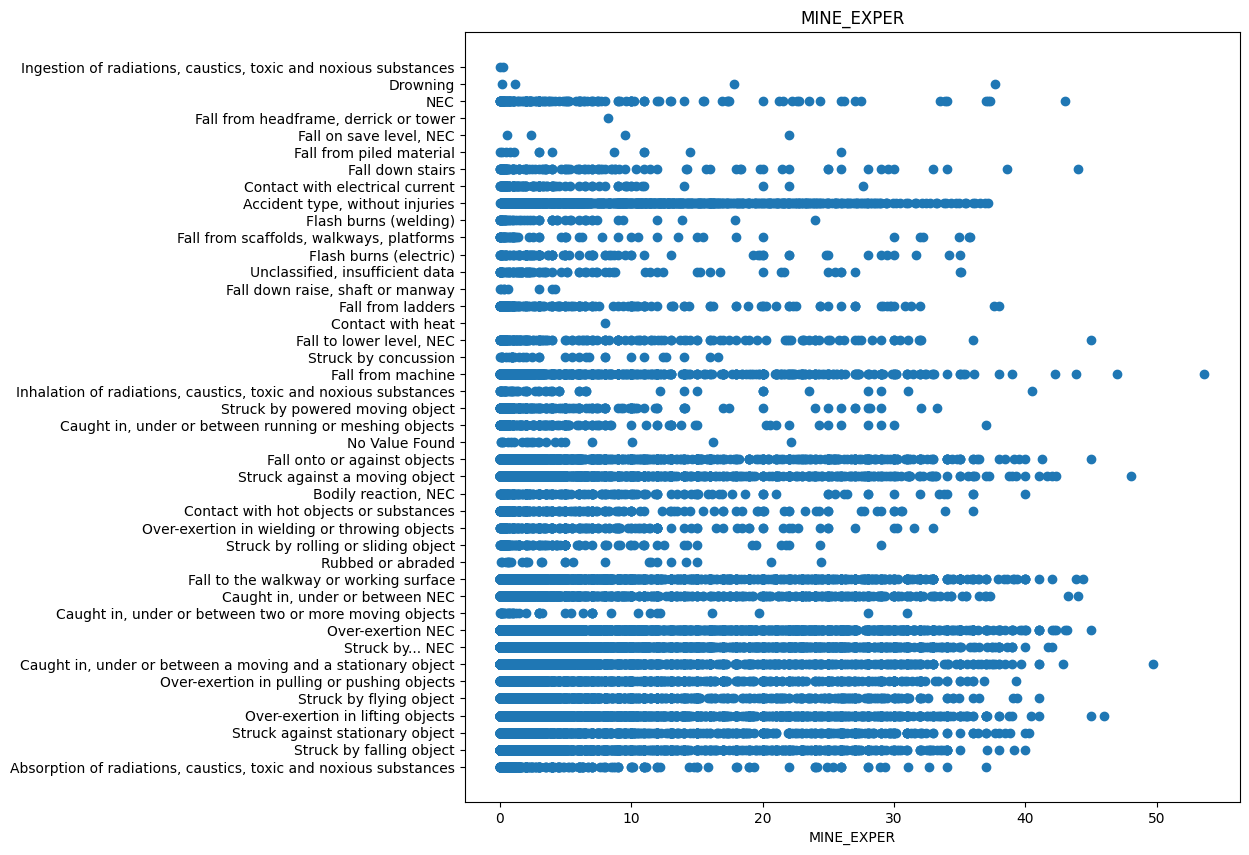

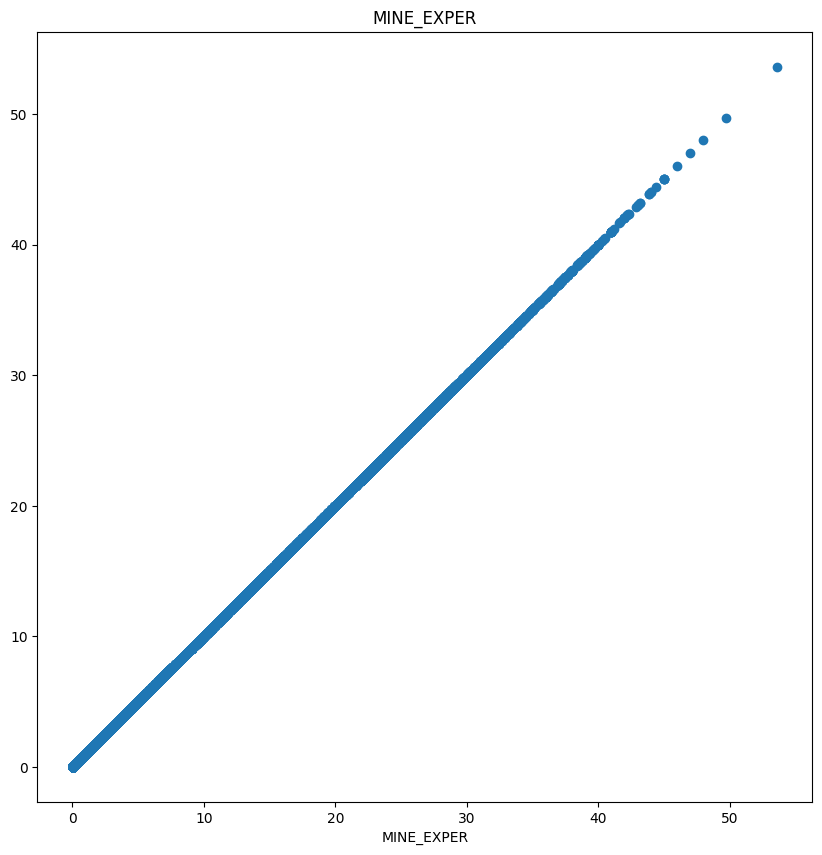

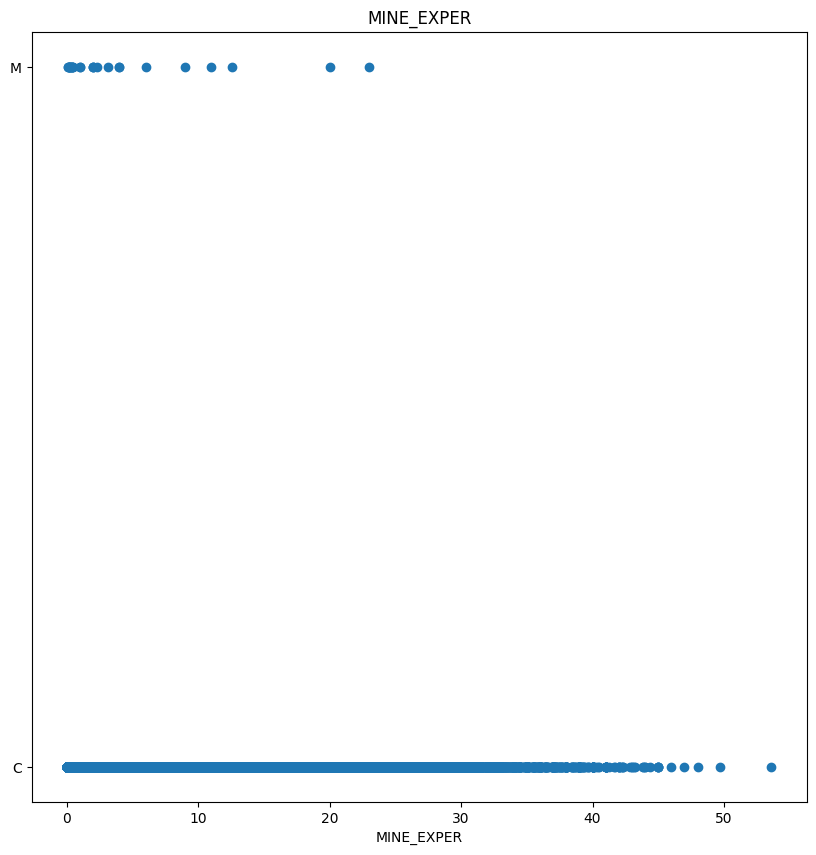

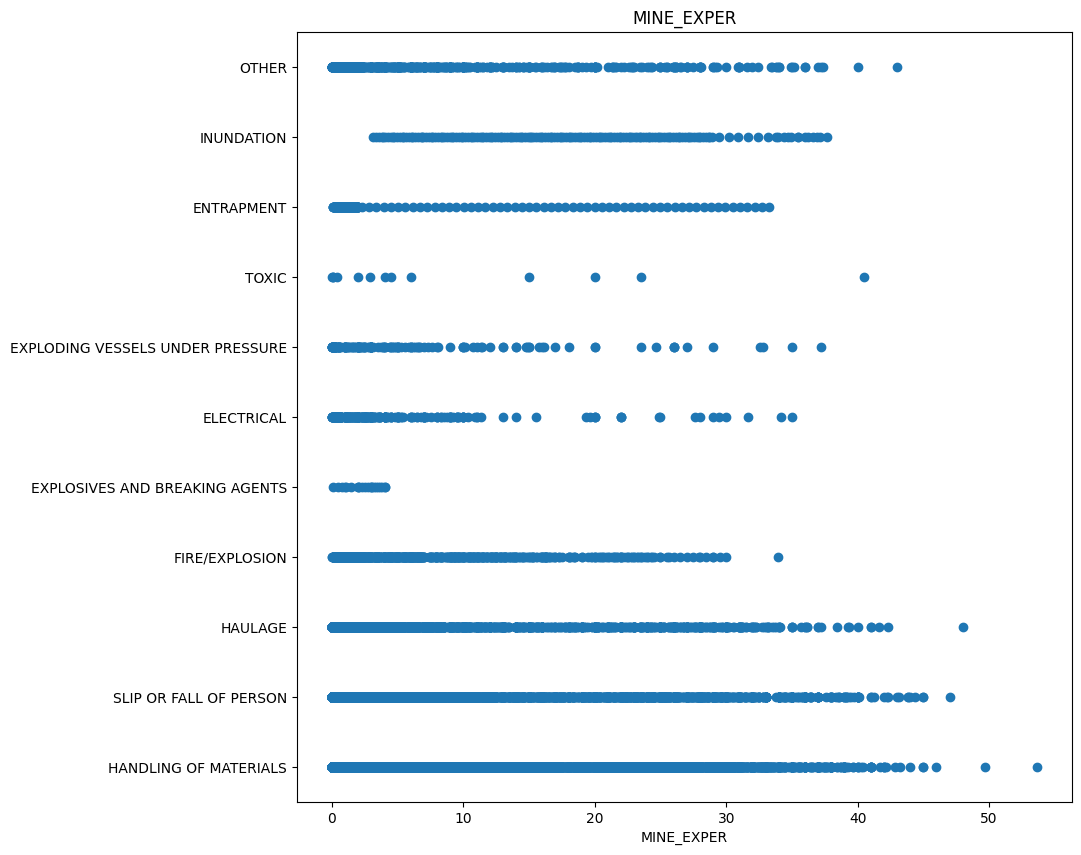

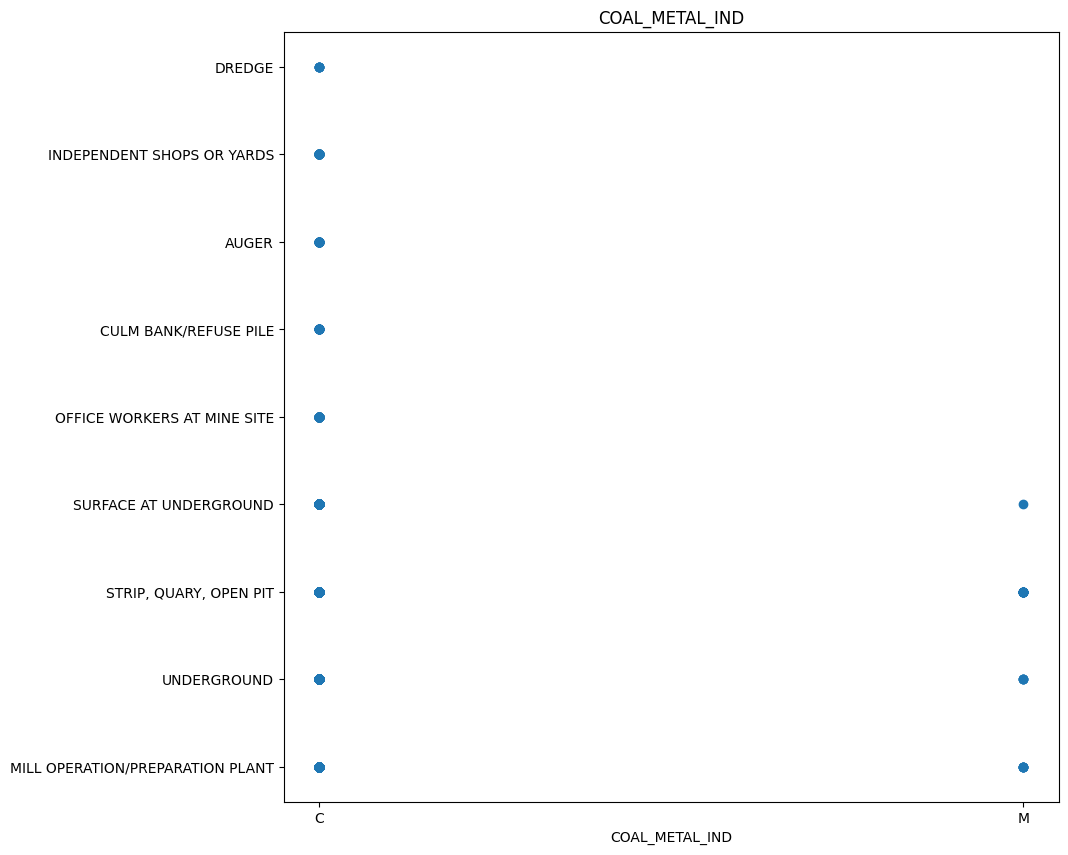

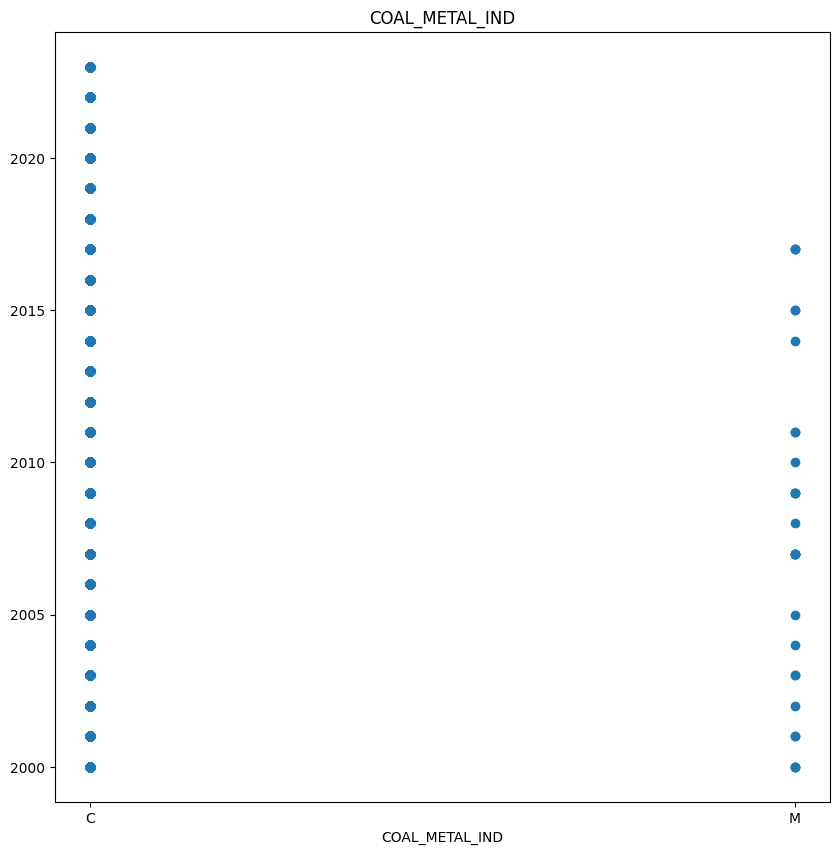

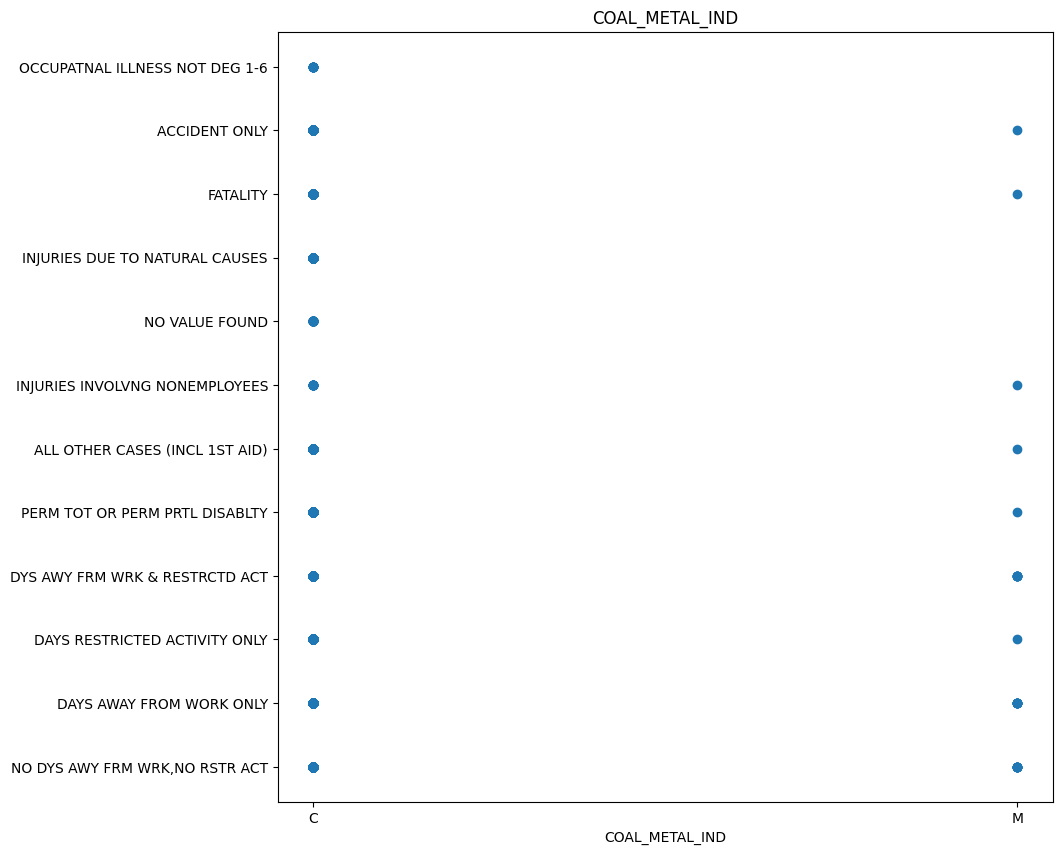

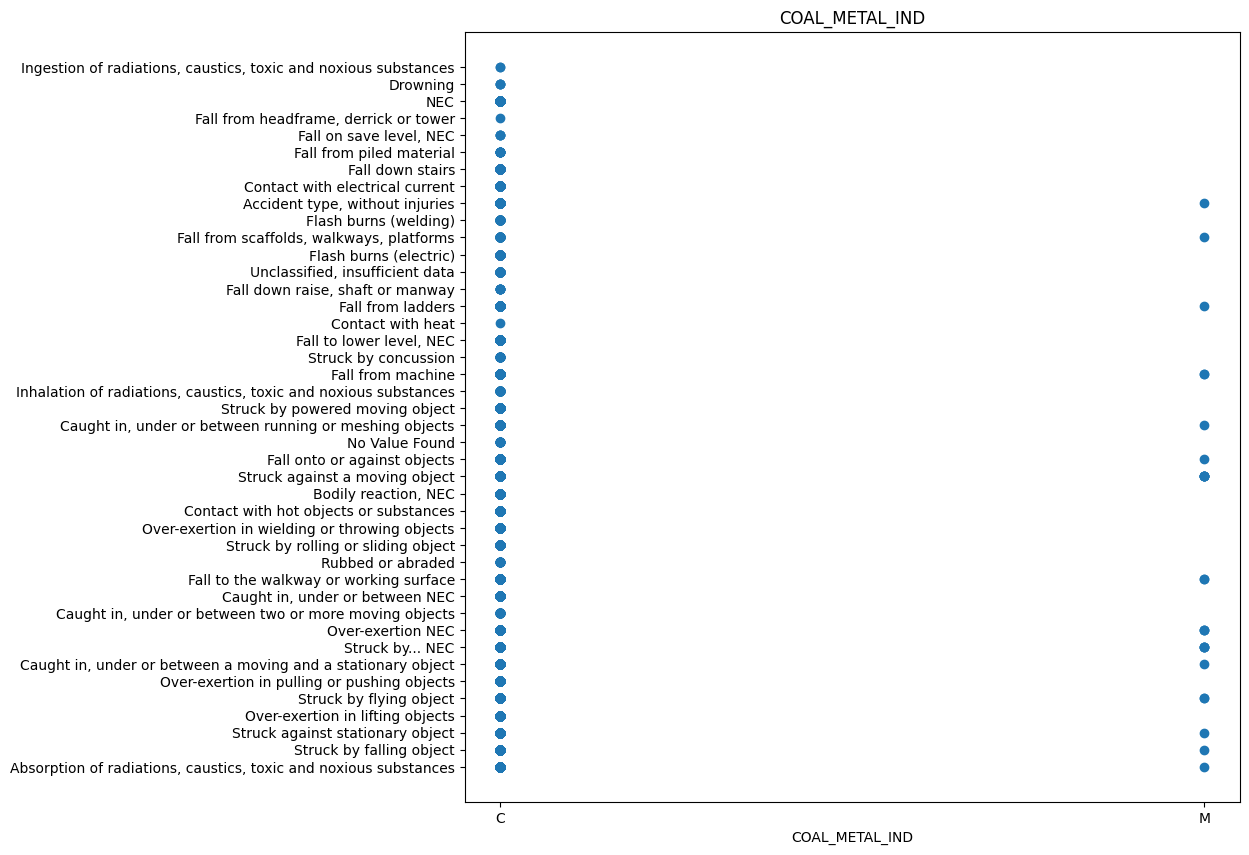

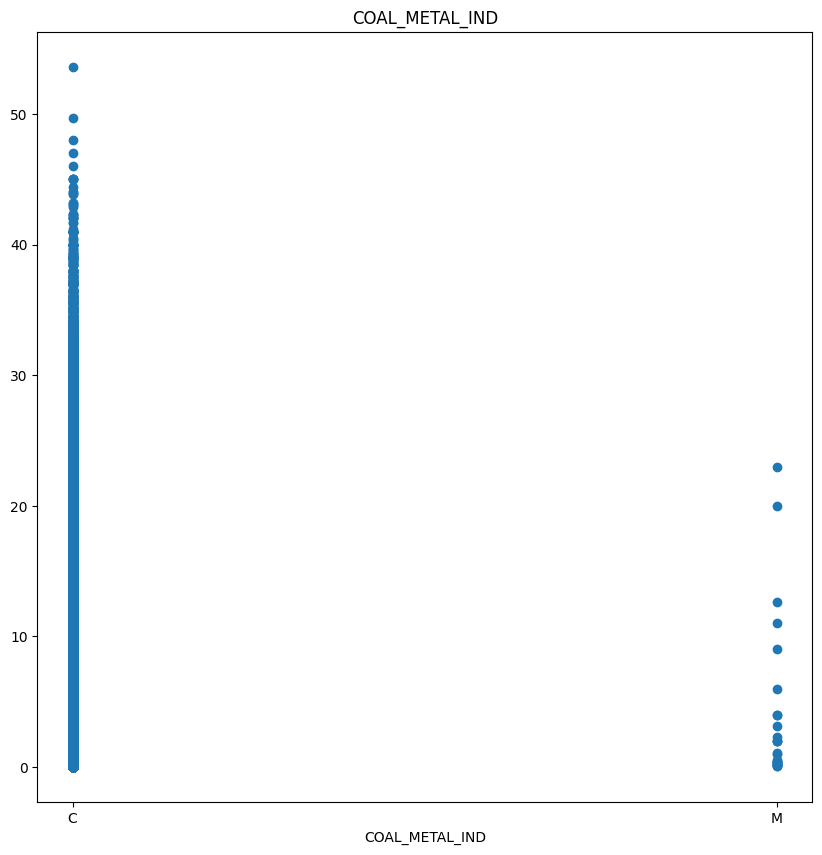

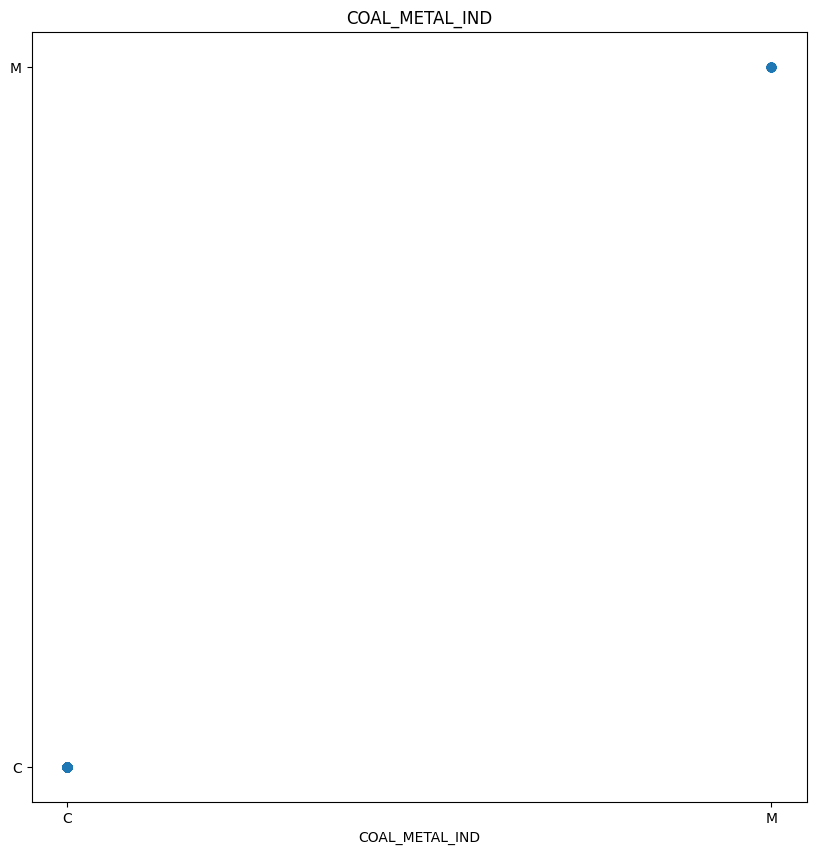

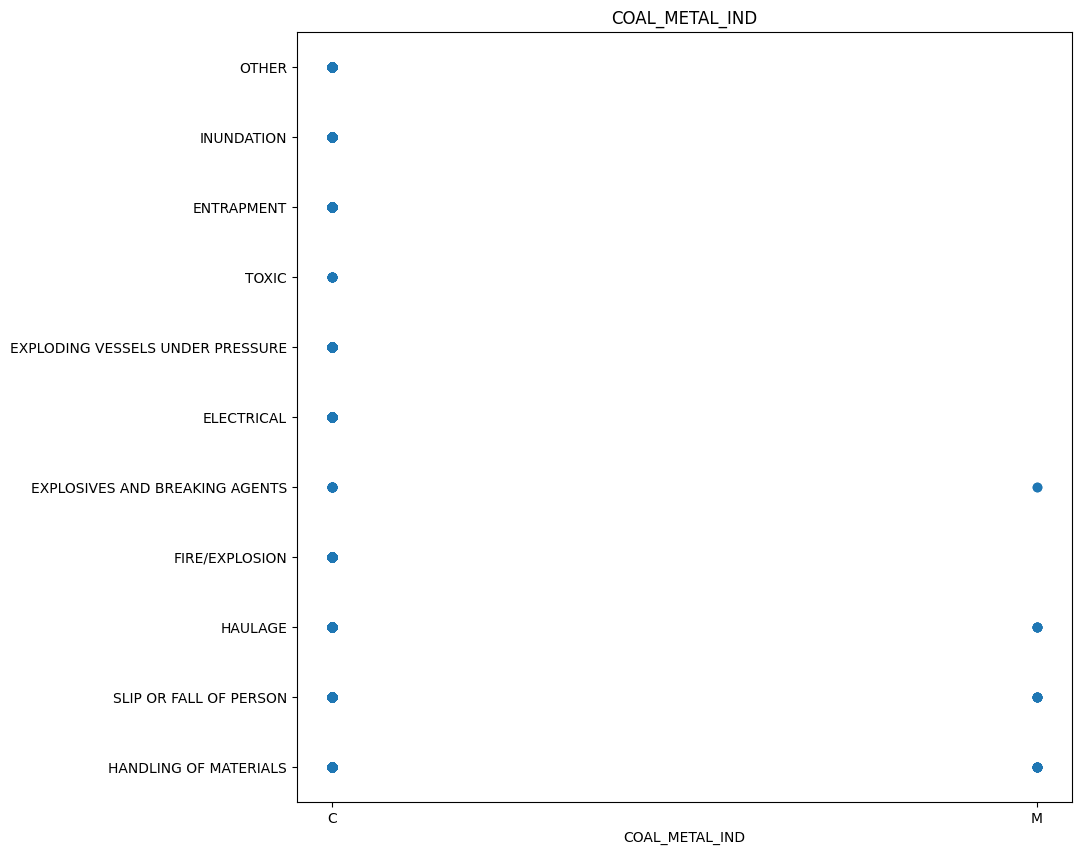

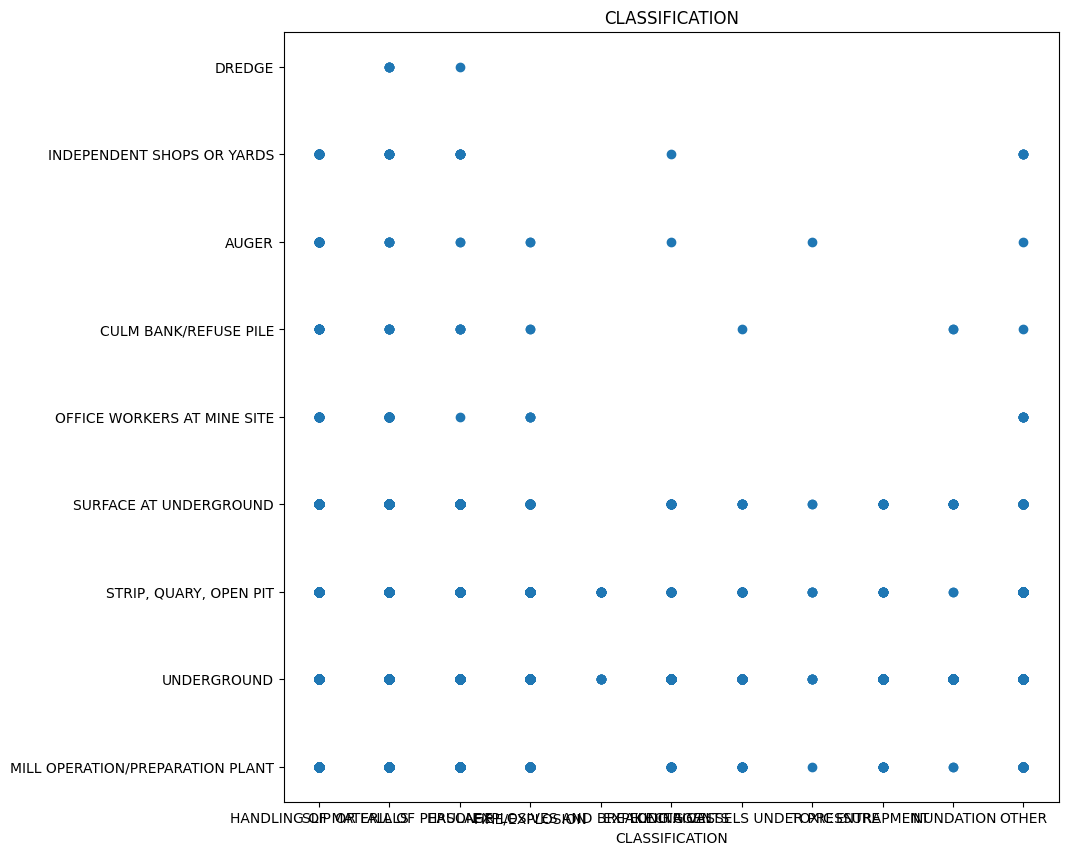

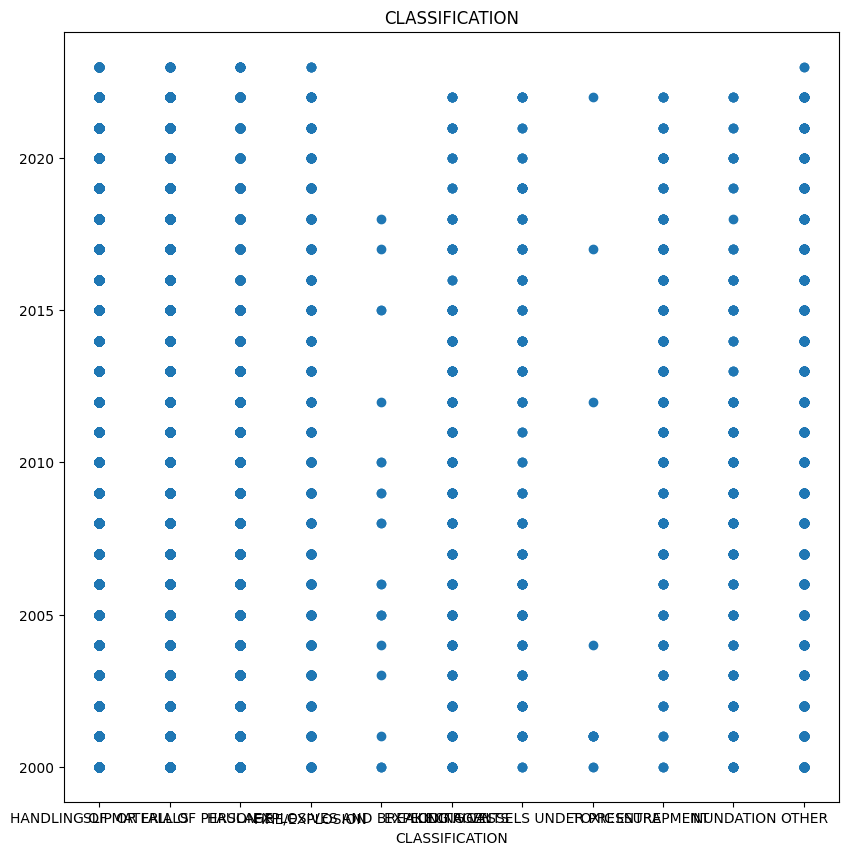

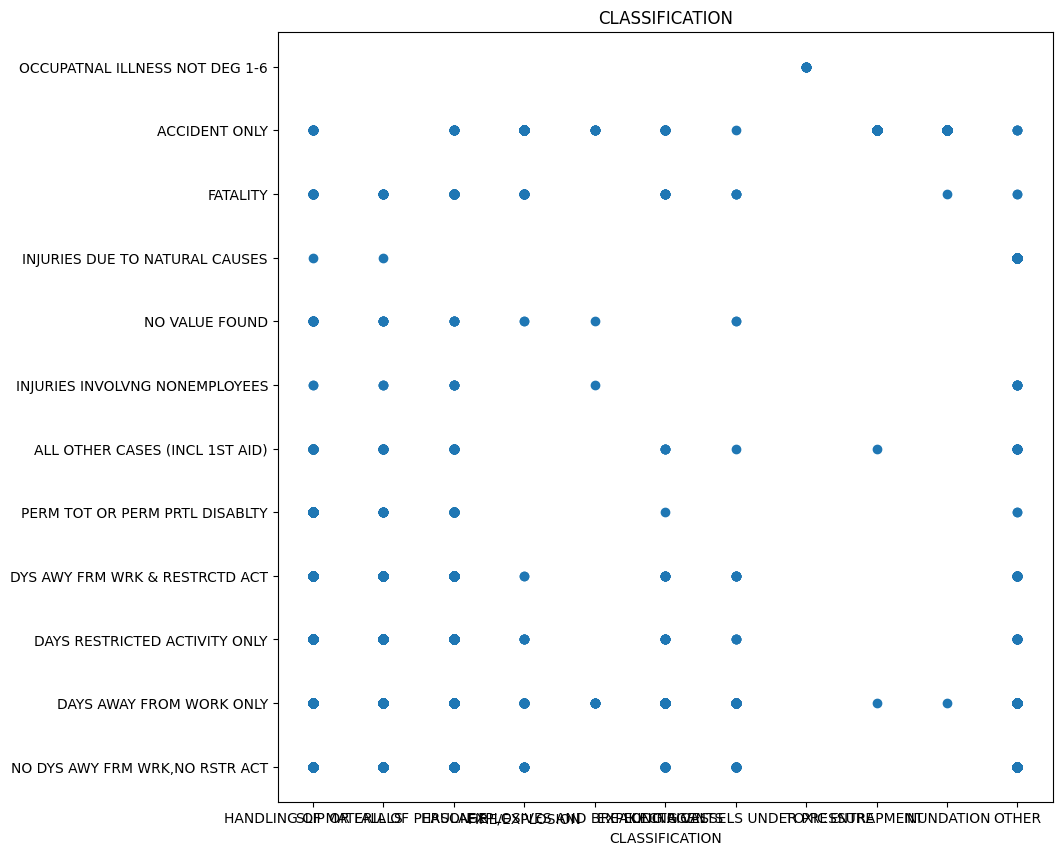

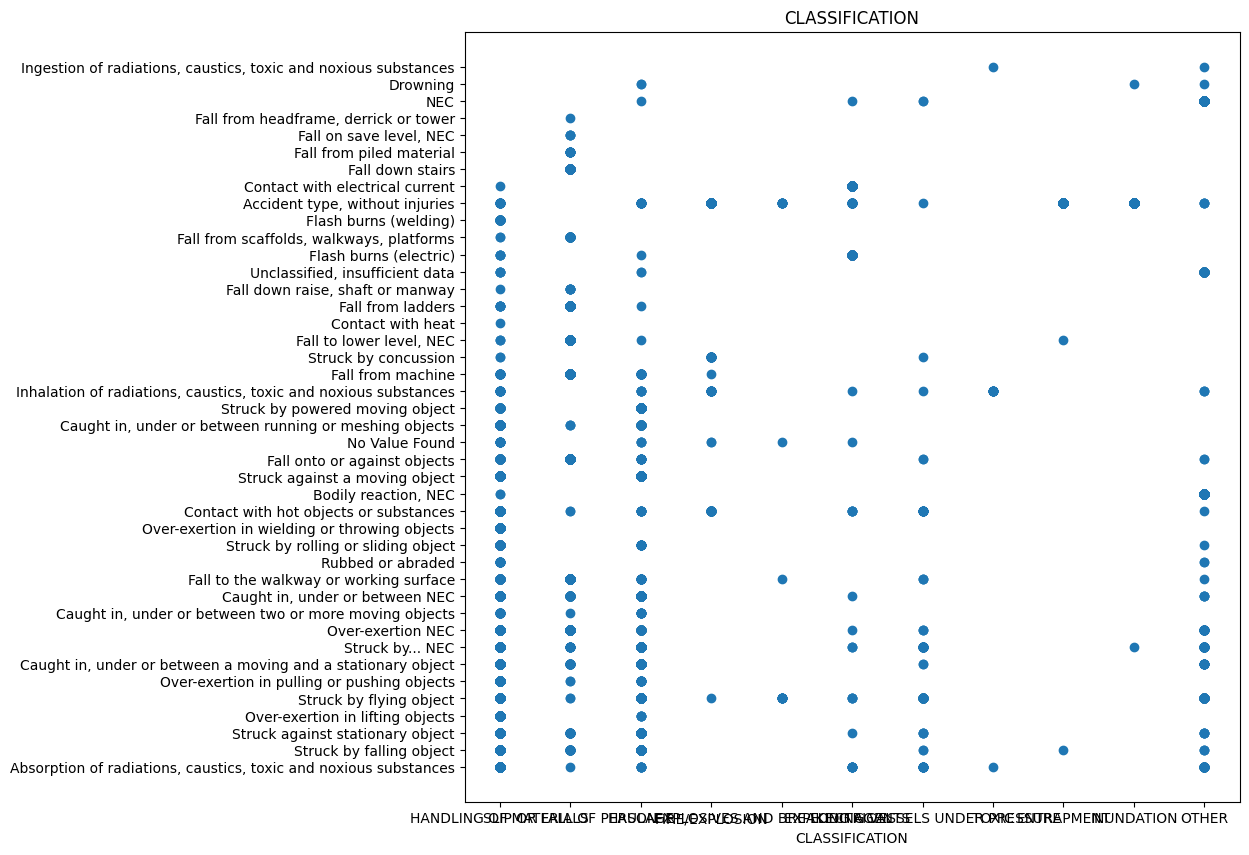

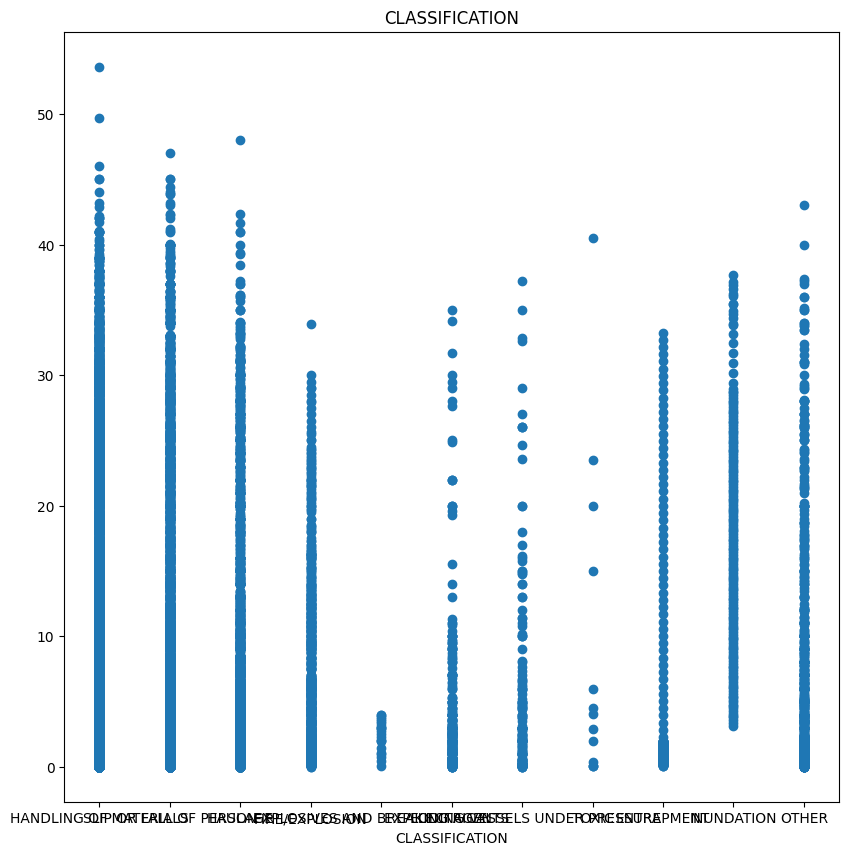

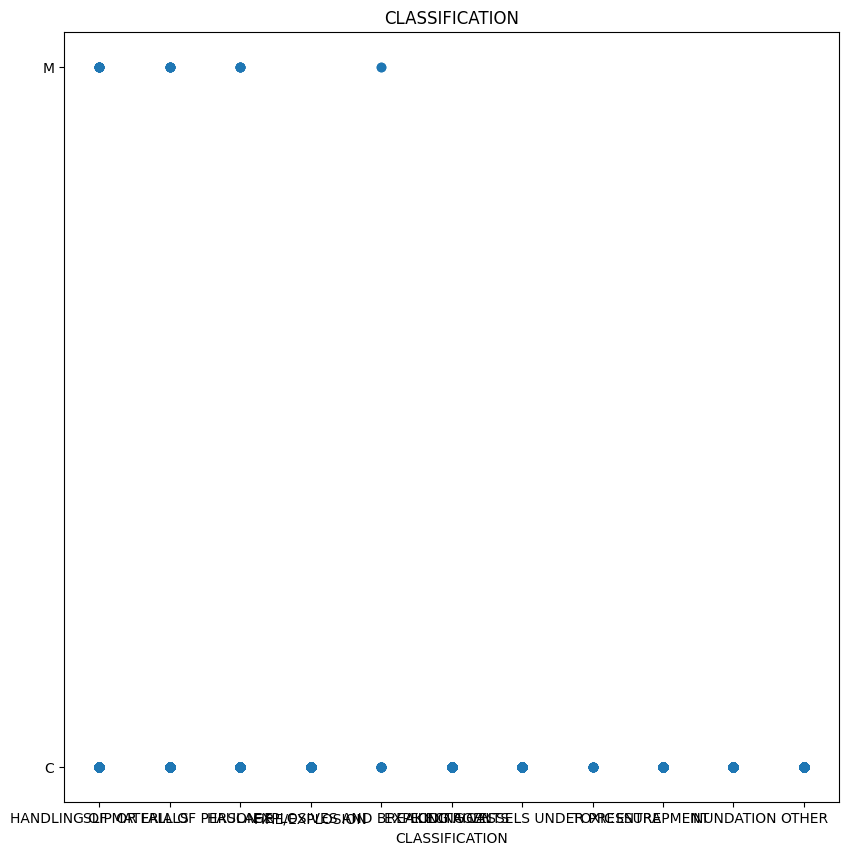

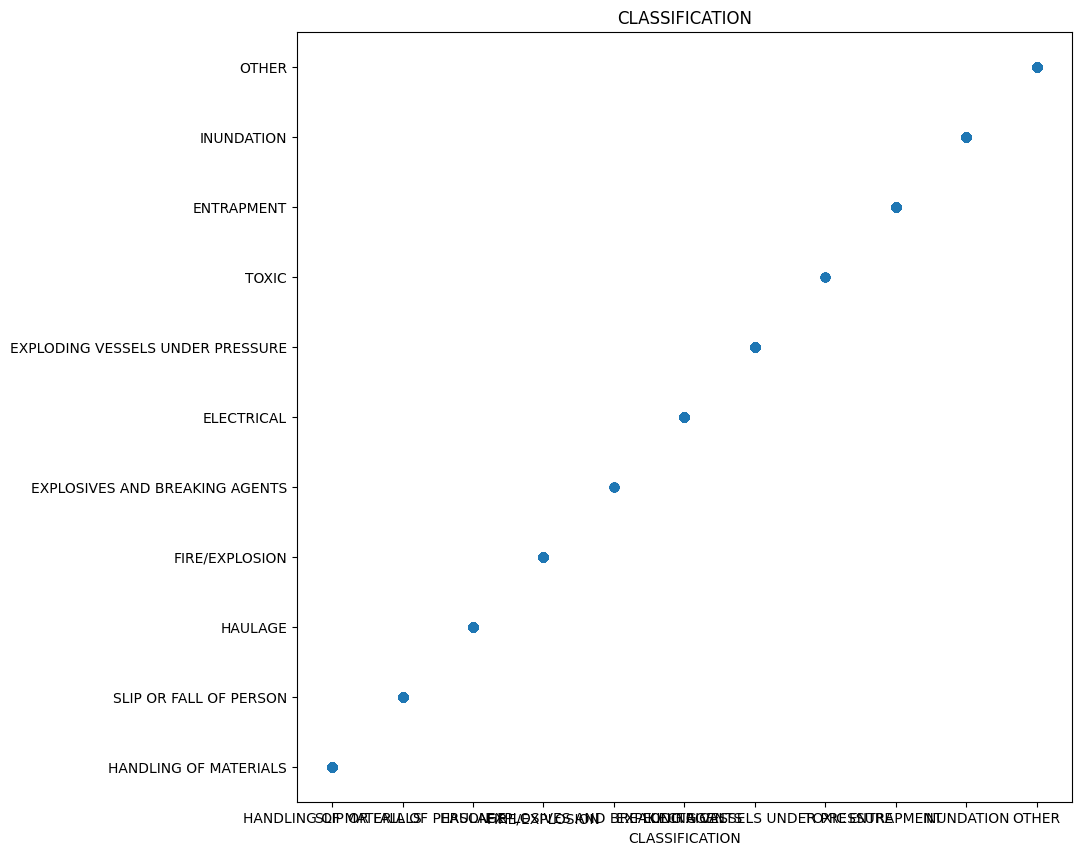

In [198]:
# ploting columns with each and every other to generate insights 

for label in cols[1:]:
    for cab in cols[1:]:
        fig = plt.figure(figsize= (10,10))
        plt.scatter(cols[label],cols[cab])
        plt.title(label)
        plt.xlabel(label)
        plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

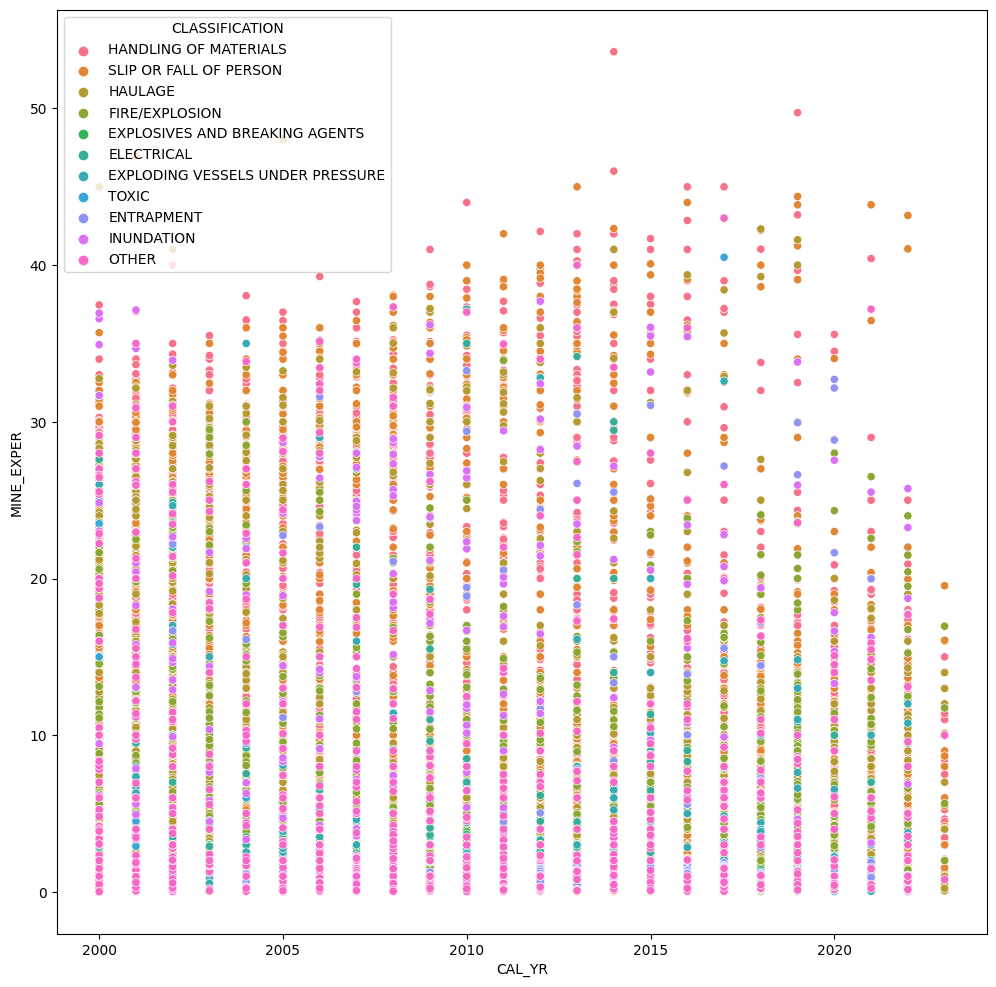

In [199]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=cols['CAL_YR'], y=cols['MINE_EXPER'], hue= cols['CLASSIFICATION'])
plt.show

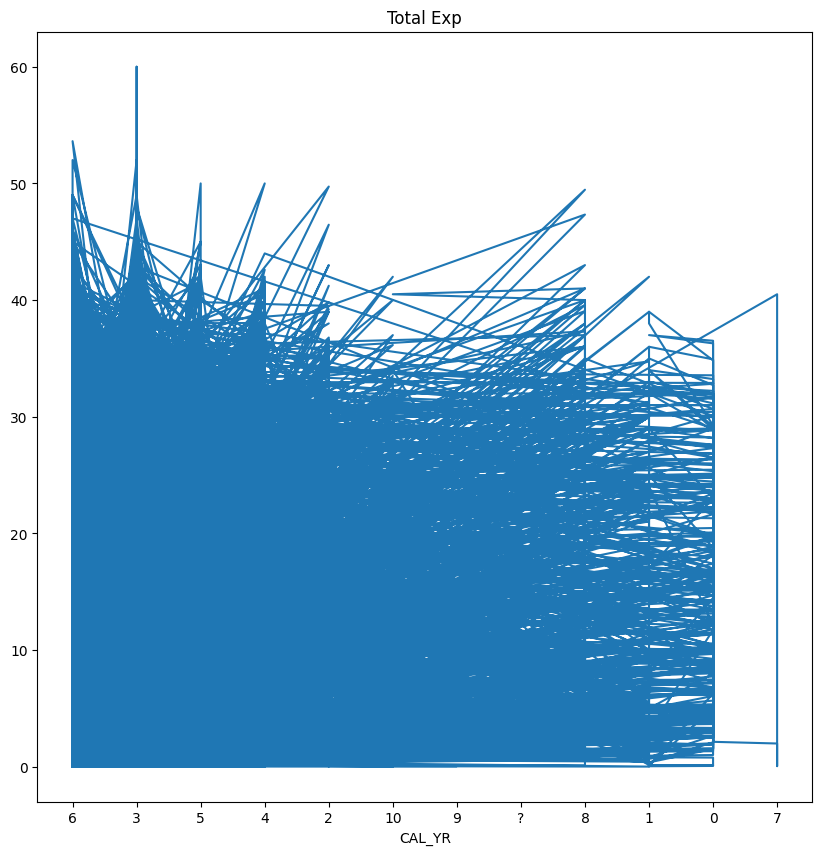

In [200]:
fig = plt.figure(figsize= (10,10))
plt.plot(lee_2['DEGREE_INJURY_CD'],lee_2['TOT_EXPER'] )
plt.title('Total Exp')
plt.xlabel('CAL_YR')
plt.show()

In [201]:
lee_2['DEGREE_INJURY_CD'].dtype

dtype('O')

Text(0, 0.5, 'Count')

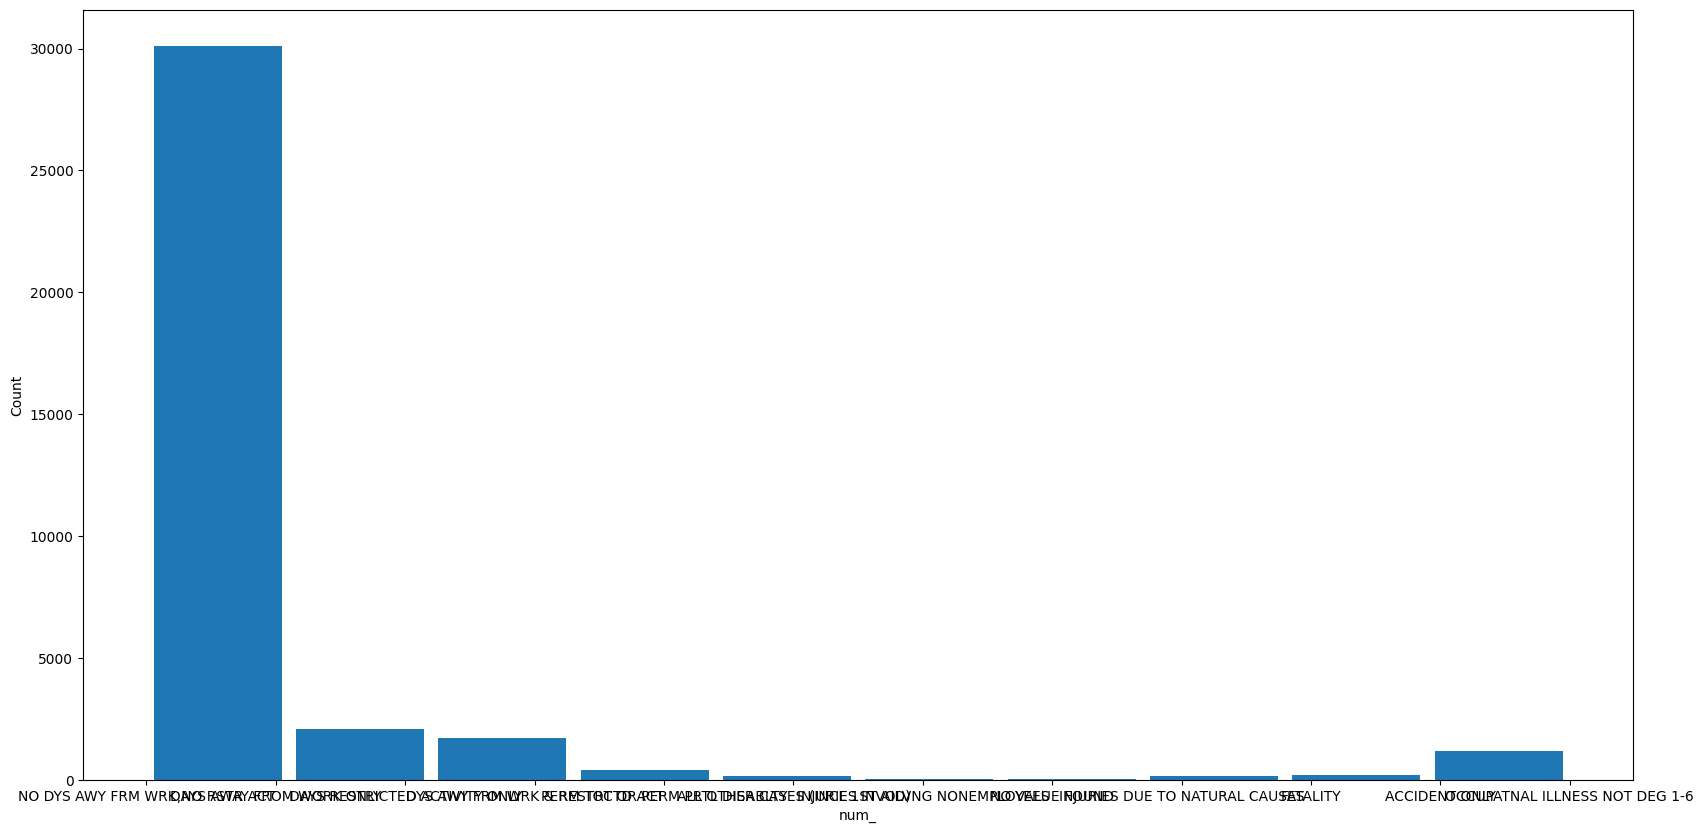

In [202]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(lee_2['DEGREE_INJURY'], rwidth = 0.9)
plt.xlabel('num_')
plt.ylabel('Count')

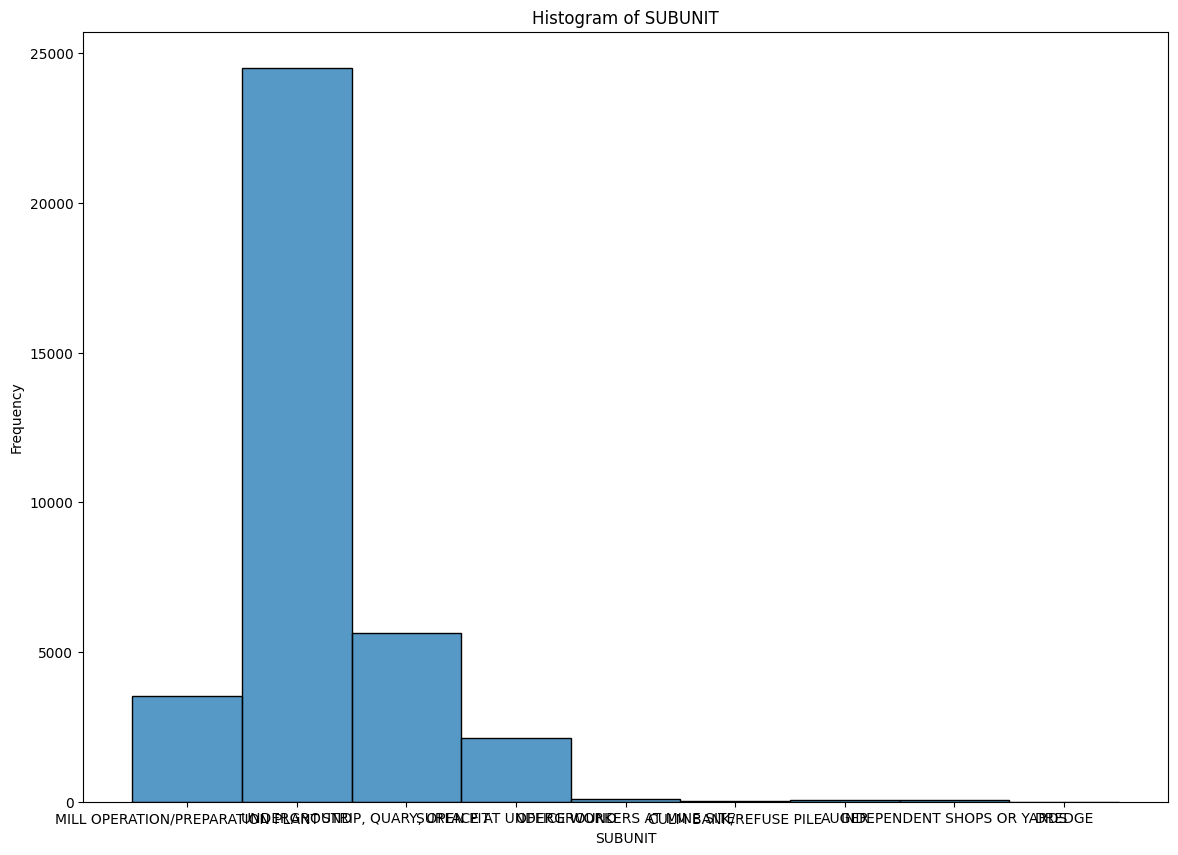

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data


# Create a categorical plot (histogram)
fig = plt.figure(figsize=(14, 10))
sns.histplot(x='SUBUNIT', bins=20, data=lee_2, stat='count', kde=False)
plt.title('Histogram of SUBUNIT')
plt.ylabel('Frequency')
plt.xlabel('SUBUNIT')
plt.show()


### Cleaning and removing null values in raw data

In [204]:
lee_4 = lee[['DOCUMENT_NO','EQUIP_MODEL_NO','SCHEDULE_CHARGE','DAYS_RESTRICT','INVEST_BEGIN_DT','CLOSED_DOC_NO','NARRATIVE','UG_LOCATION','UG_MINING_METHOD','MINING_EQUIP','EQUIP_MFR_NAME']]
lee_4

DOCUMENT_NO EQUIP_MODEL_NO  SCHEDULE_CHARGE  DAYS_RESTRICT  \
0      220143000000            NaN              0.0            0.0   
1      220163000000            NaN              0.0            0.0   
2      220053000000            NaN              0.0            0.0   
3      220063000000     12" cutter              0.0            0.0   
4      220151000000            NaN              0.0            0.0   
...             ...            ...              ...            ...   
36011  220083000000            NaN           6000.0            0.0   
36012  220060000000            NaN              0.0            0.0   
36013  220043000000            NaN           6000.0            0.0   
36014  220181000000            NaN              0.0            0.0   
36015  220142000000            NaN              0.0            0.0   

      INVEST_BEGIN_DT  CLOSED_DOC_NO  \
0                 NaN            NaN   
1                 NaN   3.201630e+11   
2                 NaN            NaN   
3                 NaN            NaN   
4                 NaN   3.201510e+11   
...               ...            ...   
36011       11/7/2008            NaN   
36012             NaN            NaN   
36013      10/18/2004            NaN   
36014             NaN   3.201820e+11   
36015        8/4/2014            NaN   

                                               NARRATIVE  \
0      ee was moving a caustic line when the line fel...   
1      employee was building and plastering a brattic...   
2      he was lifting a piece of steel. he place a ch...   
3      the technician was greasing on the sample syst...   
4      as employee was lifting top frame of 84" struc...   
...                                                  ...   
36011  employee was found slumped over a three wheel ...   
36012  employee was repairing equipment when wind ble...   
36013  was getting dressed prior to his shift, the em...   
36014  a fully trained miner was bitten by a spider w...   
36015  ee called his supervisor at the end of his shi...   

                UG_LOCATION   UG_MINING_METHOD  \
0            NO VALUE FOUND     NO VALUE FOUND   
1            VERTICAL SHAFT  Continuous Mining   
2            NO VALUE FOUND     NO VALUE FOUND   
3            NO VALUE FOUND     NO VALUE FOUND   
4        LAST OPEN CROSSCUT           Longwall   
...                     ...                ...   
36011  SLOPE/INCLINED SHAFT  Continuous Mining   
36012        NO VALUE FOUND     NO VALUE FOUND   
36013        NO VALUE FOUND     NO VALUE FOUND   
36014                  FACE           Longwall   
36015        NO VALUE FOUND     NO VALUE FOUND   

                         MINING_EQUIP  EQUIP_MFR_NAME  
0                      NO VALUE FOUND  NO VALUE FOUND  
1                      NO VALUE FOUND  NO VALUE FOUND  
2                      NO VALUE FOUND  NO VALUE FOUND  
3      Cutting machine, Chain cutter         Telsmith  
4                      NO VALUE FOUND  NO VALUE FOUND  
...                               ...             ...  
36011                  NO VALUE FOUND  NO VALUE FOUND  
36012                  NO VALUE FOUND  NO VALUE FOUND  
36013                  NO VALUE FOUND  NO VALUE FOUND  
36014                  NO VALUE FOUND  NO VALUE FOUND  
36015                  NO VALUE FOUND  NO VALUE FOUND  

[36016 rows x 11 columns]

In [205]:
import pandas as pd
lee_2['DEGREE_INJURY_CD'] = lee_2['DEGREE_INJURY_CD'].replace('?', float('nan'))
lee_2['DEGREE_INJURY_CD']= lee_2['DEGREE_INJURY_CD'].astype(float)
lee_2['DEGREE_INJURY_CD'].isnull().sum()

46

In [206]:
lee_2['TRANS_TERM'] = lee_2['TRANS_TERM'].replace('Y', float('1'))
lee_2['TRANS_TERM'] = lee_2['TRANS_TERM'].replace('N', float('0'))
lee_2['TRANS_TERM']= lee_2['TRANS_TERM'].astype(float)
lee_2['TRANS_TERM'].isnull().sum()


1841

In [207]:
lee_2['MINING_EQUIP_CD']= lee_2['MINING_EQUIP_CD'].replace('?', float('nan'))
lee_2['MINING_EQUIP_CD']= lee_2['MINING_EQUIP_CD'].astype(float)

lee_2['MINING_EQUIP_CD'].unique()

array([nan, 16., 61., 66., 36., 28., 19., 54., 13., 37., 44., 55.,  8.,
       24., 48., 12.,  9., 53., 60.,  4., 14., 67., 58., 41., 23., 57.,
       52., 29., 33., 51., 47., 15., 30.,  7., 42., 34., 45., 27., 71.,
       35., 40., 39., 65., 20., 25.,  5., 43., 68., 21., 11., 70., 10.,
        2., 69.,  6., 17., 38., 22., 56., 46., 18., 31., 64.,  3.])

In [208]:
lee_2['OCCUPATION_CD']= lee_2['OCCUPATION_CD'].replace('?', float('nan'))
lee_2['OCCUPATION_CD']= lee_2['OCCUPATION_CD'].astype(float)
lee_2['OCCUPATION_CD'].unique()

array([304.,  46., 418., 414., 116.,  44.,   4., 149.,  35., 104., 382.,
       122.,  53., 157.,  50., 462., 302., 101., 301., 374.,  16., 199.,
        49.,   2., 176.,  54., 168., 456., 328., 154.,  36., 489., 316.,
        28., 102., 216., 319., 269.,  41., 314., 350., 106., 110., 372.,
        82., 117., 334., 368., 128., 384., 494., 250., 306., 378.,   8.,
         1., 307., 276., 404., 309.,   9., 156., 124.,  34., 385., 146.,
        47.,   6., 449., 376., 383., 349.,  68.,  76., 393., 240., 399.,
       318., 315.,  43., 111., 370., 118., 392., 497., 327., 365., 119.,
       299., 352.,  40., 109., 182., 375., 369., 323.,  24., 367., 321.,
       593.,  78., 481.,  32., 333., 105., 108., 379.,  99., 262., 380.,
        nan, 311., 394., 604., 398., 396., 123., 103., 360., 310., 324.,
        10., 305., 224., 356., 464., 265., 312.,  42., 303., 373., 351.,
       397., 430., 317., 112., 388., 402., 371., 201., 387., 114., 364.,
        33., 313., 495., 395., 362., 348.,  11.,   

In [209]:
lee_2['ACTIVITY_CD']= lee_2['ACTIVITY_CD'].replace('?', float('nan'))
lee_2['ACTIVITY_CD']= lee_2['ACTIVITY_CD'].astype(float)
lee_2['ACTIVITY_CD'].unique()

array([28., 82., 39., 40., 78., 91., 77., 25., 89., 41., 92., 23., 93.,
       42., 96., 26., 80., 79., 20., 37., 75., 58., 83., 32., 21., 29.,
       72.,  8., 99., 85., 86., 38., 36., 49., 34., 43., 31., 22., 61.,
        3., 15.,  9., 16., 30., 87., 17., 88., 94., 13., 66., 33., 62.,
       27., 90.,  1., 50., nan, 73.,  2., 24., 74., 47., 65., 81., 60.,
       52., 53., 98., 55., 69., 11.,  6., 19., 95., 68., 10., 18., 56.,
        4., 67., 71., 64., 54., 44., 51., 45., 63., 97., 59., 76., 46.,
       48., 12., 14.,  7.])

In [210]:
lee_2['INJURY_SOURCE_CD']= lee_2['INJURY_SOURCE_CD'].replace('?', float('nan'))
lee_2['INJURY_SOURCE_CD']= lee_2['INJURY_SOURCE_CD'].astype(float)
lee_2['INJURY_SOURCE_CD'].unique()

array([ 24.,  21.,  88.,  35.,  89.,   6.,  86.,  83., 124., 113., 125.,
       109.,   7.,  79.,  63.,  90.,  42., 123.,   9., 112.,  68.,  84.,
       108.,   4.,  72.,  92.,  77.,  78.,  82., 121., 127.,  26., 111.,
        51.,  67.,  43., 115.,  80.,  12.,   8.,   3.,  98., 117.,  76.,
        34.,  71.,  49.,  74.,  39.,  87.,  13.,  94.,  81., 116.,  95.,
       104.,  55.,  57.,  61.,  38.,  19.,  46.,  97.,   5.,  16., 103.,
        62.,  33., 106.,  60.,   2., 107., 114., 118.,  40., 126.,  48.,
        44., 122.,  36.,  65., 105.,  50.,  69., 120.,  73.,  10.,  93.,
        20.,  37.,  nan,  27.,  25.,  41., 101.,  11.,  75., 110.,  70.,
        54., 102.,   1.,  23.,  96.,  85.,  31.,  53.,  15.,  52.,  58.,
        66.,  30.,  28.,  47.,  45.,  56.,  64.,  17., 119.,  14.,  18.,
        22.])

In [211]:
lee_2['NATURE_INJURY_CD']= lee_2['NATURE_INJURY_CD'].replace('?', float('nan'))
lee_2['NATURE_INJURY_CD']= lee_2['NATURE_INJURY_CD'].astype(float)
lee_2['NATURE_INJURY_CD'].unique()

array([130., 400., 180., 330., 220., 370., 260., 160., 320., 170., 100.,
       200., 310., 190., 390., 120., 270., 140.,  nan, 280., 250., 301.,
       300., 380., 210., 110., 350., 360., 240., 340.])

In [212]:
lee_2['INJ_BODY_PART_CD']= lee_2['INJ_BODY_PART_CD'].replace('?', float('nan'))
lee_2['INJ_BODY_PART_CD']= lee_2['INJ_BODY_PART_CD'].astype(float)
lee_2['INJ_BODY_PART_CD'].unique()

array([130., 340., 330., 440., 420., 143., 100., 512., 120., 460., 430.,
       311., 540., 450., 700., 530., 550., 144., 121., 350., 313., 410.,
       513., 314., 320., 312., 140., 200., 150., 511., 142., 510., 520.,
       141., 122., 310., 170., 300., 110., 514.,  nan, 400., 500., 600.,
       160., 800., 900.])

In [213]:
lee_2['EQUIP_MFR_CD']= lee_2['EQUIP_MFR_CD'].replace('?', float('nan'))
lee_2['EQUIP_MFR_CD']= lee_2['EQUIP_MFR_CD'].astype(float)
lee_2['EQUIP_MFR_CD'].unique()


array([  nan,  104.,  119.,  157., 3000.,  121.,  607.,    0.,   18.,
         63.,  147.,   53.,   58.,   39.,  310.,   68., 1013.,  508.,
        527.,   15.,   51.,  612.,  320.,  122., 1301.,  120.,  734.,
       1119.,  109.,  135.,  904.,   20., 2010.,   69.,   98.,   45.,
       1511.,   59.,   38.,   10.,  514.,  512.,   67.,  102.,   37.,
         33., 1222.,   46.,  425., 1932.,   70.,  125., 1902., 1010.,
        231.,  325.,    8.,   43.,   75.,   55.,  715.,   35.,   17.,
        105.,  207.,  601.,   82.,  138., 1006.,   64.,   56., 1207.,
         40., 1907.,   41.,   89.,  727.,  724.,  126.,  148.,  804.,
       2303., 1210.,  706.,   71.,  110., 1605.,  139.,  711.,   23.,
         47.,   48.,  106., 1107.,   81., 1912.,  406.,   66.,   44.,
        705.,  123.,   87., 1123.,  143.,  156.,  308.,  133., 1209.,
        108.,   61.,  208.,  151.,   62.,   73.,    7., 2800., 1302.,
        129.,  131.,    6.,   86., 1404., 1816.,  142.,   21., 1341.,
        322.,  909.,

In [214]:
lee_4 = lee_2.drop(['SUBUNIT','ACCIDENT_DT','DEGREE_INJURY','OCCUPATION','ACTIVITY','INJURY_SOURCE','NATURE_INJURY','INJ_BODY_PART','EQUIP_MFR_CD','MINING_EQUIP_CD'],axis=1)
lee_4

SUBUNIT_CD  CAL_YR  CAL_QTR  FISCAL_YR  FISCAL_QTR  ACCIDENT_TIME  \
0              30    2014        3       2014           4           1330   
1               1    2016        4       2017           1           1400   
2               3    2005        4       2006           1           1325   
3              30    2006        4       2007           1           1140   
4               1    2015        1       2015           2           1430   
...           ...     ...      ...        ...         ...            ...   
36011           1    2008        4       2009           1           2054   
36012           3    2006        1       2006           2           2200   
36013           2    2004        4       2005           1            730   
36014           1    2018        2       2018           3           1830   
36015          30    2014        3       2014           4           9999   

       DEGREE_INJURY_CD  FIPS_STATE_CD  SHIFT_BEGIN_TIME  \
0                   6.0              1             530.0   
1                   3.0              1             700.0   
2                   3.0              1             600.0   
3                   3.0              4             800.0   
4                   3.0              8             800.0   
...                 ...            ...               ...   
36011               8.0             51            1445.0   
36012               6.0             51            1700.0   
36013               8.0             54             800.0   
36014               3.0             54            1600.0   
36015               8.0             54             600.0   

                                           ACCIDENT_TYPE  ...  JOB_EXPER  \
0      Absorption of radiations, caustics, toxic and ...  ...       3.69   
1      Absorption of radiations, caustics, toxic and ...  ...       1.29   
2                               Struck by falling object  ...       0.27   
3                       Struck against stationary object  ...      18.98   
4                       Over-exertion in lifting objects  ...       0.12   
...                                                  ...  ...        ...   
36011                                                NEC  ...       5.81   
36012                            Struck by flying object  ...       4.00   
36013                                                NEC  ...       0.83   
36014  Absorption of radiations, caustics, toxic and ...  ...       0.46   
36015                                                NEC  ...      18.00   

       OCCUPATION_CD  ACTIVITY_CD  INJURY_SOURCE_CD  NATURE_INJURY_CD  \
0              304.0         28.0              24.0             130.0   
1               46.0         82.0              21.0             130.0   
2              418.0         28.0              88.0             400.0   
3              414.0         39.0              88.0             180.0   
4              116.0         28.0              88.0             330.0   
...              ...          ...               ...               ...   
36011          418.0         34.0             127.0             340.0   
36012          304.0         39.0              92.0             320.0   
36013           36.0          9.0             127.0             340.0   
36014           16.0         28.0               1.0             280.0   
36015          306.0         99.0             127.0             340.0   

       INJ_BODY_PART_CD  DAYS_LOST  TRANS_TERM  COAL_METAL_IND  \
0                 130.0        0.0         0.0               C   
1                 130.0       11.0         0.0               C   
2                 340.0        1.0         0.0               C   
3                 330.0        0.0         NaN               C   
4                 440.0        9.0         1.0               C   
...                 ...        ...         ...             ...   
36011             600.0        0.0         NaN               C   
36012             130.0        0.0         0.0         

In [215]:
# one-hot encoding

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
values = lee_2['CLASSIFICATION']

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
integer_encoded




array([5, 5, 5, ..., 8, 8, 8])

In [216]:
one_hot_encoded_data = pd.get_dummies(lee_4, columns = ['CLASSIFICATION', 'ACCIDENT_TYPE'])
one_hot_encoded_data

SUBUNIT_CD  CAL_YR  CAL_QTR  FISCAL_YR  FISCAL_QTR  ACCIDENT_TIME  \
0              30    2014        3       2014           4           1330   
1               1    2016        4       2017           1           1400   
2               3    2005        4       2006           1           1325   
3              30    2006        4       2007           1           1140   
4               1    2015        1       2015           2           1430   
...           ...     ...      ...        ...         ...            ...   
36011           1    2008        4       2009           1           2054   
36012           3    2006        1       2006           2           2200   
36013           2    2004        4       2005           1            730   
36014           1    2018        2       2018           3           1830   
36015          30    2014        3       2014           4           9999   

       DEGREE_INJURY_CD  FIPS_STATE_CD  SHIFT_BEGIN_TIME  NO_INJURIES  ...  \
0                   6.0              1             530.0            1  ...   
1                   3.0              1             700.0            1  ...   
2                   3.0              1             600.0            1  ...   
3                   3.0              4             800.0            1  ...   
4                   3.0              8             800.0            1  ...   
...                 ...            ...               ...          ...  ...   
36011               8.0             51            1445.0            1  ...   
36012               6.0             51            1700.0            1  ...   
36013               8.0             54             800.0            1  ...   
36014               3.0             54            1600.0            1  ...   
36015               8.0             54             600.0            1  ...   

       ACCIDENT_TYPE_Rubbed or abraded  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   
...                                ...   
36011                                0   
36012                                0   
36013                                0   
36014                                0   
36015                                0   

       ACCIDENT_TYPE_Struck against a moving object  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
36011                                             0   
36012                                             0   
36013                                             0   
36014                                             0   
36015                                             0   

       ACCIDENT_TYPE_Struck against stationary object  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   1   
4                                                   0   
...                                               ...   
36011                                               0   
36012                                               0   
36013                                               0   
36014                                               0   
36015                                               0   

       ACCIDENT_TYPE_Struck by concussion  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                 

In [217]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


# Converting type of columns to category
lee_4['CLASSIFICATION'] = lee_4['CLASSIFICATION'].astype('category')
lee_4['ACCIDENT_TYPE'] = lee_4['ACCIDENT_TYPE'].astype('category')


# Assigning numerical values and storing it in another columns
lee_4['C_new'] = lee_4['CLASSIFICATION'].cat.codes
lee_4['A_new'] = lee_4['ACCIDENT_TYPE'].cat.codes

# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns

enc_data = pd.DataFrame(enc.fit_transform(lee_4[['C_new', 'A_new']]).toarray())

# Merge with main
New_df = lee_4.join(enc_data)

New_df.nunique()


SUBUNIT_CD     9
CAL_YR        24
CAL_QTR        4
FISCAL_YR     24
FISCAL_QTR     4
              ..
48             2
49             2
50             2
51             2
52             2
Length: 78, dtype: int64

In [218]:
lee_4.dtypes

SUBUNIT_CD             int64
CAL_YR                 int64
CAL_QTR                int64
FISCAL_YR              int64
FISCAL_QTR             int64
ACCIDENT_TIME          int64
DEGREE_INJURY_CD     float64
FIPS_STATE_CD          int64
SHIFT_BEGIN_TIME     float64
ACCIDENT_TYPE       category
NO_INJURIES            int64
TOT_EXPER            float64
MINE_EXPER           float64
JOB_EXPER            float64
OCCUPATION_CD        float64
ACTIVITY_CD          float64
INJURY_SOURCE_CD     float64
NATURE_INJURY_CD     float64
INJ_BODY_PART_CD     float64
DAYS_LOST            float64
TRANS_TERM           float64
COAL_METAL_IND        object
CLASSIFICATION      category
C_new                   int8
A_new                   int8
dtype: object

In [219]:
lee_2['COAL_METAL_IND'].replace({'C':1,'M':0},inplace=True)
lee_2['TRANS_TERM'].replace({'Y':1,'N':0},inplace=True)
lee_2['COAL_METAL_IND'].unique()

array([1, 0], dtype=int64)

In [220]:
lee_4['C_new'].nunique()

11

In [221]:
lee_5 = lee_4.drop(['CLASSIFICATION','ACCIDENT_TYPE','COAL_METAL_IND'], axis=1)
lee_5

SUBUNIT_CD  CAL_YR  CAL_QTR  FISCAL_YR  FISCAL_QTR  ACCIDENT_TIME  \
0              30    2014        3       2014           4           1330   
1               1    2016        4       2017           1           1400   
2               3    2005        4       2006           1           1325   
3              30    2006        4       2007           1           1140   
4               1    2015        1       2015           2           1430   
...           ...     ...      ...        ...         ...            ...   
36011           1    2008        4       2009           1           2054   
36012           3    2006        1       2006           2           2200   
36013           2    2004        4       2005           1            730   
36014           1    2018        2       2018           3           1830   
36015          30    2014        3       2014           4           9999   

       DEGREE_INJURY_CD  FIPS_STATE_CD  SHIFT_BEGIN_TIME  NO_INJURIES  ...  \
0                   6.0              1             530.0            1  ...   
1                   3.0              1             700.0            1  ...   
2                   3.0              1             600.0            1  ...   
3                   3.0              4             800.0            1  ...   
4                   3.0              8             800.0            1  ...   
...                 ...            ...               ...          ...  ...   
36011               8.0             51            1445.0            1  ...   
36012               6.0             51            1700.0            1  ...   
36013               8.0             54             800.0            1  ...   
36014               3.0             54            1600.0            1  ...   
36015               8.0             54             600.0            1  ...   

       JOB_EXPER  OCCUPATION_CD  ACTIVITY_CD  INJURY_SOURCE_CD  \
0           3.69          304.0         28.0              24.0   
1           1.29           46.0         82.0              21.0   
2           0.27          418.0         28.0              88.0   
3          18.98          414.0         39.0              88.0   
4           0.12          116.0         28.0              88.0   
...          ...            ...          ...               ...   
36011       5.81          418.0         34.0             127.0   
36012       4.00          304.0         39.0              92.0   
36013       0.83           36.0          9.0             127.0   
36014       0.46           16.0         28.0               1.0   
36015      18.00          306.0         99.0             127.0   

       NATURE_INJURY_CD  INJ_BODY_PART_CD  DAYS_LOST  TRANS_TERM  C_new  A_new  
0                 130.0             130.0        0.0         0.0      5      0  
1                 130.0             130.0       11.0         0.0      5      0  
2                 400.0             340.0        1.0         0.0      5     36  
3                 180.0             330.0        0.0         NaN      5     34  
4                 330.0             440.0        9.0         1.0      5     29  
...                 ...               ...        ...         ...    ...    ...  
36011             340.0             600.0        0.0         NaN      8     26  
36012             320.0             130.0        0.0         0.0      8     37  
36013             340.0             600.0        0.0         NaN      8     26  
36014             280.0             600.0       32.0         0.0      8      0  
36015             340.0             600.0        0.0         NaN      8     26  

[36016 rows x 22 columns]

In [222]:
lee_5.dtypes

SUBUNIT_CD            int64
CAL_YR                int64
CAL_QTR               int64
FISCAL_YR             int64
FISCAL_QTR            int64
ACCIDENT_TIME         int64
DEGREE_INJURY_CD    float64
FIPS_STATE_CD         int64
SHIFT_BEGIN_TIME    float64
NO_INJURIES           int64
TOT_EXPER           float64
MINE_EXPER          float64
JOB_EXPER           float64
OCCUPATION_CD       float64
ACTIVITY_CD         float64
INJURY_SOURCE_CD    float64
NATURE_INJURY_CD    float64
INJ_BODY_PART_CD    float64
DAYS_LOST           float64
TRANS_TERM          float64
C_new                  int8
A_new                  int8
dtype: object

In [223]:
lee_5.isnull().sum()

SUBUNIT_CD             0
CAL_YR                 0
CAL_QTR                0
FISCAL_YR              0
FISCAL_QTR             0
ACCIDENT_TIME          0
DEGREE_INJURY_CD      46
FIPS_STATE_CD          0
SHIFT_BEGIN_TIME      32
NO_INJURIES            0
TOT_EXPER              0
MINE_EXPER             0
JOB_EXPER              0
OCCUPATION_CD       1236
ACTIVITY_CD         1213
INJURY_SOURCE_CD    1211
NATURE_INJURY_CD    1233
INJ_BODY_PART_CD    1233
DAYS_LOST           4220
TRANS_TERM          1841
C_new                  0
A_new                  0
dtype: int64

In [224]:
lee_5.dtypes

SUBUNIT_CD            int64
CAL_YR                int64
CAL_QTR               int64
FISCAL_YR             int64
FISCAL_QTR            int64
ACCIDENT_TIME         int64
DEGREE_INJURY_CD    float64
FIPS_STATE_CD         int64
SHIFT_BEGIN_TIME    float64
NO_INJURIES           int64
TOT_EXPER           float64
MINE_EXPER          float64
JOB_EXPER           float64
OCCUPATION_CD       float64
ACTIVITY_CD         float64
INJURY_SOURCE_CD    float64
NATURE_INJURY_CD    float64
INJ_BODY_PART_CD    float64
DAYS_LOST           float64
TRANS_TERM          float64
C_new                  int8
A_new                  int8
dtype: object

## Model 

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [226]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [227]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform X_train to fill missing values
X_train_I = imputer.fit_transform(X_train)

# Fit and transform y_train to fill missing values
y_train_I = imputer.fit_transform(y_train)




In [228]:
from sklearn.preprocessing import StandardScaler

# Create a scaler
scaler = StandardScaler()

# Fit and transform X_train to scale the features
X_train_S = scaler.fit_transform(X_train_I)
y_train_S = scaler.fit_transform(y_train_I)



In [229]:
model_1=LinearRegression()
model_1.fit(X_train_S, y_train_S)

LinearRegression()

In [230]:
model_1.score(X_train_S,y_train_S)

0.22462490486421272

In [231]:
from sklearn.tree import DecisionTreeRegressor

In [232]:
model_2=DecisionTreeRegressor(max_depth=3)

In [233]:
model_2.fit(X_train_S, y_train_S)
model_2.score(X_train_S,y_train_S)

0.5073841494627485

In [234]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_test_I = imputer.fit_transform(X_test)
y_test_I = imputer.fit_transform(y_test)

X_test_S = scaler.fit_transform(X_test_I)
y_test_S = scaler.fit_transform(y_test_I)


In [235]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor(n_estimators=50, max_depth=8)
model_3.fit(X_train_S,y_train_S)
model_3.score(X_test_S,y_test_S)

0.7731067914039915

In [236]:
pred_3 = model_3.predict(X_test_S)

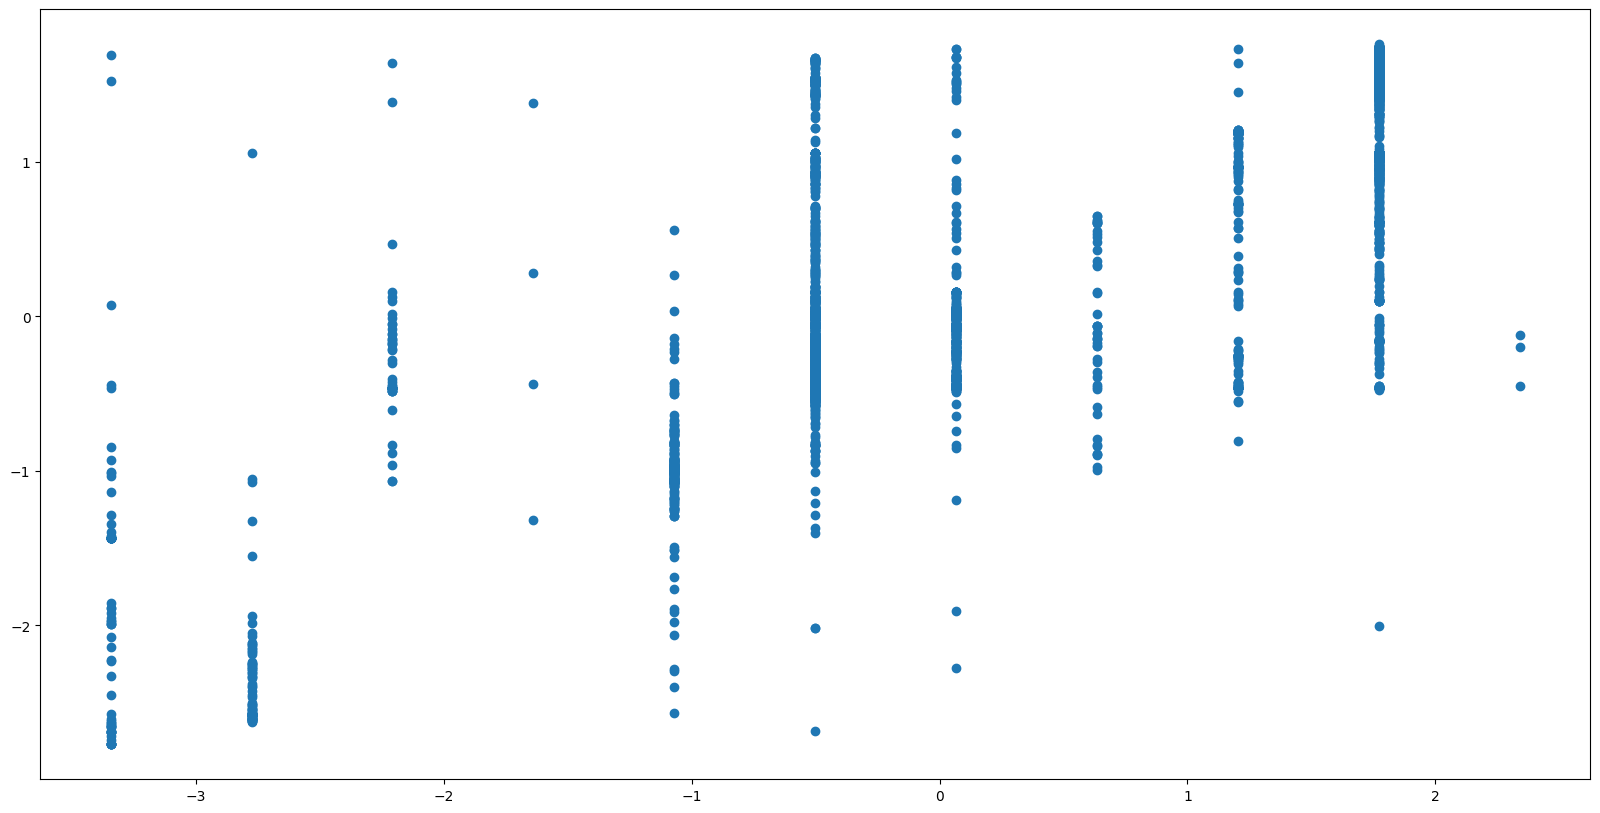

In [237]:
plt.scatter(y_test_S, pred_3)

In [238]:
from xgboost import XGBRegressor
from sklearn import metrics
model_7 = XGBRegressor(n_estimators=1000 ,learning_rate= 0.01)
model_7.fit(X_train_S, y_train_S)
score = model_7.score(X_test_S, y_test_S)
print(score)

0.8070864092468012


In [239]:
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings("ignore")
model_4=BaggingRegressor(n_estimators=25,max_features=4,max_samples=0.3,n_jobs=None)
model_4.fit(X_train_S ,y_train_S)
model_4.score(X_test_S ,y_test_S)

0.5295245559684562